# Project 1: SAT & ACT Analysis

## Problem Statement

The new format for the SAT was released in March 2016, intended to prepare students to join the workforce as skilled and educated persons.

**The re-design was intended to:**
1. Encourage higher participation by:
    - making the test more transparent
    - removing penalties for incorrect answers.


2. Better prepare students to take on college educations by:
    - giving students specific areas of study to focus on
    - ensuring student readiness for college by setting new benchmarks for the new test structure

Sources

1. [Business Insider: SAT is changing the format of its test in 2016](https://www.businessinsider.com/the-sat-is-changing-its-format-in-2016-and-will-be-easier-2015-6/?IR=T)
2. [College Board's official report on the SAT re-design](https://collegereadiness.collegeboard.org/pdf/test-specifications-redesigned-sat-1.pdf)

**Key questions:**
1. In which states are participation rates increasing after the re-design? 
    - If so, why are they increasing? (Are there any trends in the data that explain the increases?)
2. Are more students achieving the benchmark score after sitting for the redesigned SAT?

**NOTE** <br>
Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice.

## Executive Summary

The SAT format was changed in 2016, resulting in changes in educational policy in several states in the US. This project aims to examine the impact of this change, and what should be done to capitalise on this change moving forward.

The research reveals a strong negative correlation of approximately -0.80 between SAT and ACT participation. As one increases, the other tends to decrease sharply. This is because students who take one test are not likely to take the other, as both are used for the same purpose: college admissions. 

The revamped SAT has been effective at incentivising participation, either by nature of its transparent and less punitive test structure or through government contracts that ensure state sponsorship or incentives for participation. In the case of Illinois and Colorado, both states now offer state-sponsored SAT exams and enjoy full or nearly full participation amongst their high school candidates.

Further investigation reveals that most state averages outperform the national SAT average score, whereas about 50% of all state mean composite scores outperform the national benchmark composite score. This suggests that the SAT may be better-structured, allowing for higher achievement without compromising the quality of tests. This may also be due to the removal of punitive scoring, where wrong answers were given deductions.

There are, however, limitations to this project's analysis. There are not enough samples of data to conclusively prove that the change in the SAT's structure is effective and will have long-lasting impact. 

It is therefore recommended to:
- Continue gathering data for the new test
- Factor in student populations in data to give context to participation levels
- Obtain more government contracts for delivery of SAT exams
- Persuade more colleges to offer incentives to students to take SATs instead of ACTs, such as higher scholarship awards and better perks.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [223]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt

%matplotlib inline
sns.set()

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [224]:
#Code:
sat_2017=pd.read_csv(r'..\data\sat_2017.csv')
act_2017=pd.read_csv(r'..\data\act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [225]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [226]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [227]:
#Check sat_2017 for duplicate States
print(len(sat_2017['State'].unique()))
print(sat_2017.shape)

#Check act_2017 for duplicate States
print(len(act_2017['State'].unique()))
print(act_2017.shape)

51
(51, 5)
52
(52, 7)


Answer:

SAT and ACT have different scoring methods. The key columns to study are the Total (SAT) and Composite (ACT) columns and each tests's participation by state. 

The Total and Composite columns are the final scores used for comparison and admission to colleges.

Participation levels provide a basis for fair comparison (according to US College Board).

The test structures and score computation methods are different (evident from differing number of columns).

SAT takes the sum of scores for 2 test sections and uses that as the final figure for admissions, rankings, and other related matters.

ACT, on the other hand, uses a 4-part test structure. The highest possible score is 36 and the lowest is 0. The final score used for comparison is also not a total of the four sub-sections, but an average of the score of all parts.


Finally, the two dataframes seem to have differing lengths although they are for the same country. Further investigation will be done in a cell below.

#### 4a. Does the data look complete? 

**Answer** 

At first glance, it looks complete. 

However, checking the total number of rows for each table revealed a **discrepancy**. 

**Row counts did not match. National average for SAT 2017 was not included. Possibly missing value, or ACT 2017 national average can be dropped.**

**However, since we are more interested in the increases in participation for each state, we could drop the ACT national average. It is not granular enough to help with analysis of changes in state participation levels.**
<details>
    <summary> <span style="color:blue">Click here for Detailed Findings</span> </summary>
There are 51 rows of data in SAT 2017, representing the 50 states of the US and the District of Columbia.

However, there are 52 rows of data in ACT 2017. These rows represent the 50 states, District of Columbia, and the National Average. 

There is either an extra row in ACT 2017 or a missing row in SAT 2017. </details>

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer**

Minimum score for SAT: 0

Maximum score value for SAT: 800

Minimum score value for ACT: 1

Maximum score value for ACT: 36

Yes, there are some issues:

1. In SAT 2017, Maryland's Math score has a typo error. The value is 52 when instead it should be 524. ([Official source](https://reports.collegeboard.org/pdf/2017-maryland-sat-suite-assessments-annual-report.pdf))

2. In SAT 2017, various other scores are off by +1 or -1. However, these can be ignored safely because they are due to rounding errors. ([Official source](https://reports.collegeboard.org/sat-suite-program-results/class-2018-results))


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [228]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Min score of 52 for math seems suspicious, as it is almost **6 standard deviations** away from the mean. 

If this is an error, other errors could exist. It is worth checking through all of them.

In [229]:
#Create function for checking SAT data. 
#Defining this function so it takes a dataframe as an argument and it can be applied to any new dataframe.

def replace_small_sat(x):        #create a function to be called later in a map() operation to set values <=1 to 0
    if x <= 1:
        return x*0
    else:
        return x            #convert small differences to zero, isolating large differences to be fixed

def sat_check_totals_diff(df,name):                    
    nulls = np.where(pd.isnull(df))           #First, check for null values
        
    if nulls[0].size==0:
        print("Nulls or Nans: NONE")
        
        reported_totals = df.iloc[:,4]            #Take Totals column so it can be compared with calculated totals
       
        calc_totals = df.iloc[:,2] + df.iloc[:,3] #Take ERW and Math scores and total them for comparison to reported totals.

        totals_diff = reported_totals - calc_totals #find difference between totals, if any

        totals_diff = list(map(replace_small_sat,totals_diff)) #set values <=1 to 0, because they can be ignored

        sat_diff_dict = dict(enumerate(totals_diff))         #create a dictionary from the elements in totals_diff with indices as keys

        sat_large_diff ={k:v for k,v in sat_diff_dict.items() if v !=0}  #identify large differences ONLY, for printing

        if sat_large_diff != {}:
            print("Large difference detected in Totals!")
            df_keys = list(sat_large_diff.keys())  
            return df.loc[df_keys]           #return all rows where error values are detected
        
        return df         #if no nulls and no large diffs, return full dataframe
            
    else:
        print("Nulls or NaNs detected! Please check, then run the cell again.")
        return nulls    #if null values are detected, display them for fixing instead of performing other operations

In [230]:
sat_check_totals_diff(sat_2017,'sat_2017')

Nulls or Nans: NONE
Large difference detected in Totals!


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [231]:
sat_2017.loc[20,'Math'] = 52+ (1060 - (536+52))
sat_2017.loc[[20]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [232]:
def replace_small_act(x): #create a function to be called later in a map() operation to set values <=1 to 0
    if x >= -0.5 and x <= 0.5:
        return x*0
    else:
        return x            #convert small differences to zero, isolating large differences to be fixed

def act_check_composite_diff(df,col_start=2,col_end=6):                    
    nulls = np.where(pd.isnull(df))           #First, check for null values
        
    if nulls[0].size==0:
        print("Nulls or Nans: NONE")
                    
        act_columns = list(df.columns)
        sel_columns = [x for x in act_columns[col_start:col_end]]
        
        reported_comp = df.iloc[:,6]    #Take Composite column so it can be compared with calculated Composite
       
        sub_df = df.loc[:,sel_columns] #Calculate composite scores for Eng, Math, Reading, Science for comparison to reported composite.
        
        calc_comp = sub_df.mean(axis=1)
        
        comp_diff = calc_comp - reported_comp
        
        comp_diff = list(map(replace_small_act,comp_diff)) #set values <=1 to 0, because they can be ignored

        act_diff_dict = dict(enumerate(comp_diff))         #create a dictionary from the elements in totals_diff with indices as keys

        act_large_diff ={k:v for k,v in act_diff_dict.items() if v !=0}  #identify large differences ONLY, for printing

        if act_large_diff != {}:
            print("Large difference detected in Composite!")
            df_keys = list(act_large_diff.keys())  
            return df.loc[df_keys]           #return all rows where error values are detected
        
        return df         #if no nulls and no large diffs, return full dataframe
            
    else:
        print("Nulls or NaNs detected! Please check, then run the cell again.")
        return nulls    #if null values are detected, display them for fixing instead of performing other operations
        


**TypeError** discovered while executing function. It appears that the Composite column was entered or read in as strings, **preventing the intended arithmetic deduction from executing.**

In [233]:
act_2017.loc[[51]]

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [234]:
act_2017.iloc[51,6]='20.2'
act_2017.iloc[51,6]

'20.2'

In [235]:
#re-define function with pd.to_numeric for the reported composites

def act_check_composite_diff(df,col_start=2,col_end=6):                    
    nulls = np.where(pd.isnull(df))           #First, check for null values
        
    if nulls[0].size==0:
        print("Nulls or Nans: NONE")
        
        act_columns = list(df.columns)
        sel_columns = [x for x in act_columns[col_start:col_end]]
        
        reported_comp = pd.to_numeric(df.iloc[:,6])    #Take Composite column so it can be compared with calculated Composite
       
        sub_df = df.loc[:,sel_columns] #Calculate composite scores for Eng, Math, Reading, Science for comparison to reported composite.
        
        calc_comp = sub_df.mean(axis=1)
        
        comp_diff = calc_comp - reported_comp
        
        comp_diff = list(map(replace_small_act,comp_diff)) #set values <=1 to 0, because they can be ignored

        act_diff_dict = dict(enumerate(comp_diff))         #create a dictionary from the elements in totals_diff with indices as keys

        act_large_diff ={k:v for k,v in act_diff_dict.items() if v !=0}  #identify large differences ONLY, for printing

        if act_large_diff != {}:
            print("Large difference detected in Composite!")
            df_keys = list(act_large_diff.keys())  
            return df.loc[df_keys]           #return all rows where error values are detected
        
        return df         #if no nulls and no large diffs, return full dataframe
            
    else:
        print("Nulls or NaNs detected! Please check, then run the cell again.")
        return nulls    #if null values are detected, display them for fixing instead of performing other operations
        


In [236]:
act_check_composite_diff(act_2017)

Nulls or Nans: NONE
Large difference detected in Composite!


,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


According to the check function, in ACT 2017, there is only one apparent arithmetic error in the dataframe. There are no Null or NaN values.

In [237]:
act_2017.iloc[21,5] = 23.2
act_2017.iloc[21,5]

23.2

In [238]:
act_check_composite_diff(act_2017)

Nulls or Nans: NONE


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [239]:
#code
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [240]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

SAT 2017 - Wrong Datatypes
- Participation
    - Should be float64

ACT 2017 - Wrong Datatypes
- Participation
    - Should be float64
    
- Composite
    - Should be float64 (discovered while cleaning)

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [241]:
def part_to_pct(y): #create a function that converts participation levels from strings to percentages

    try:
        if isinstance(y,float): #float value expected. if float, return the entered value.
            return y

        elif isinstance(y,str):
            if '%' in y:               #if value is a string containing %, replace % with blank and convert to float percentage
                y = y.replace('%','')
                y = float(y)/100.0

            else:                     #if value is a string not containing %, convert string to float
                y = float(y)

            return y

    except ValueError as error:
        print(error)
    


In [242]:
sat_2017_part = list(map(part_to_pct,sat_2017['Participation']))
sat_2017['Participation'] = sat_2017_part
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [243]:
act_2017_part = list(map(part_to_pct,act_2017['Participation']))
act_2017['Participation'] = act_2017_part
act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


- Fix any individual values preventing other columns from being the appropriate type.

In [244]:
#Individual value errors were discovered and fixed in previous section.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [245]:
#code
act_2017_comp = list(map(part_to_pct,act_2017['Composite']))
act_2017['Composite'] = act_2017_comp
act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


- Display the data types again to confirm they are correct.

In [246]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [247]:
#Code:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [248]:
#code

def col_change_sat(df,year=0):
    df_col_sat = list(df.columns)
    df_col_sat = ['sat_'+str(year)+'_'+str(x.lower().replace(' ','_')) for x in df_col_sat if str(year) not in x]
    
    if len(df_col_sat)!=0:       #if columns have not already been renamed, rename them and return the updated dataframe
        df.columns = df_col_sat
        df.columns = df.columns.str.replace('evidence-based_reading_and_writing','erw')
        return df
    
    else:                        #if columns have already been renamed, just return the dataframe and make no modifications
        return df
    
    

def col_change_act(df,year=0):
    df_col_act = list(df.columns)
    df_col_act = ['act_'+str(year)+'_'+str(x.lower().replace(' ','_')) for x in df_col_act if str(year) not in x]
    
    if len(df_col_act)!=0:        #if columns have not already been renamed, rename them and return the updated dataframe
        df.columns = df_col_act
        df.columns = df.columns.str.replace('evidence-based_reading_and_writing','erw')
        return df
    
    else:                         #if columns have already been renamed, just return the dataframe and make no modifications
        return df
    

col_change_sat(sat_2017,2017)


,sat_2017_state,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [249]:
col_change_act(act_2017,2017)

,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

**ANSWER**

|Feature|Type|Dataset|Description|Min|Max|
|---|---|---|---|---|---|
|**sat_2017_state**|string|SAT 2017|The name of the state in the US for which corresponding SAT scores are displayed.<br>US has 50 States and 1 District of Columbia.| 
|**sat_2017_participation**|float|SAT 2017|The percentage of the state's high school students participating in the SATs for that year.  <br>Expressed as a float for easier calculation. <br>(e.g. 0.03 means 3% of the state's high school students participated in the SATs that year.)|0.00 |1.00| 
|**sat_2017_erw**|integer|SAT 2017|The mean score achieved by the state's students for Evidence-based Reading and Writing, **rounded to the nearest whole number.** <br>This section tests a participant's abiility to apply language skills correctly in reading and editing. <br>Unit is integer and represents the average for each state of the US.| 0|800| 
|**sat_2017_math**|integer|SAT 2017|The mean score achieved by the state's students for Mathematics, **rounded to the nearest whole number.** <br>This section tests a participant's abiility to apply mathematics skills correctly. <br>Unit is integer and represents the average for each state of the US.|0|800| 
|**sat_2017_total**|integer|SAT 2017|The mean Total score of both sections of the SAT for the year 2017. Derived by taking the mean of the 2 sections of the test.<br>Figure does not necessarily equal to the sum of the means for each section, due to rounding. <br> Unit is integer and represents the average for each state of the US.|0|1600| 
|**act_2017_state**|string|ACT 2017|The name of the state in the US for which corresponding ACT scores are displayed.<br>US has 50 States and 1 District of Columbia.| 
|**act_2017_participation**|float|ACT 2017|The percentage of the state's high school students participating in the ACTs for that year.  <br>Expressed as a float for easier calculation. <br>(e.g. 0.03 means 3% of the state's high school students participated in the SATs that year.)|0.00|1.00| 
|**act_2017_english**|float|ACT 2017|The mean score achieved by the state's high school students for English.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's ability to use English mechanics (grammar etc) and rhetoric.|1.0|36.0| 
|**act_2017_math**|float|ACT 2017|The mean score achieved by the state's high school students for Mathematics.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's ability to correctly apply mathematics skills.|1.0|36.0| 
|**act_2017_reading**|float|ACT 2017|The mean score achieved by the state's high school students for Reading.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's reading comprehension skills.|1.0|36.0| 
|**act_2017_science**|float|ACT 2017|The mean score achieved by the state's high school students for Science.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's Science skills.|1.0 |36.0| 
|**act_2017_composite**|float|ACT 2017|The mean Composite score for each State, inclusive of all participants. Derived by taking the mean of the 4 sections of the test. <br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This is a key value used by students around the US as a benchmark for whether their ACT score is good.|1.0|36.0| 
|**sat_2018_state**|string|SAT 2018|The name of the state in the US for which corresponding SAT scores are displayed.<br>US has 50 States and 1 District of Columbia.| 
|**sat_2018_participation**|float|SAT 2018|The percentage of the state's high school students participating in the SATs for that year.  <br>Expressed as a float for easier calculation. <br>(e.g. 0.03 means 3% of the state's high school students participated in the SATs that year.)|0.00 |1.00| 
|**sat_2018_erw**|integer|SAT 2018|The mean score achieved by the state's students for Evidence-based Reading and Writing, **rounded to the nearest whole number.** <br>This section tests a participant's abiility to apply language skills correctly in reading and editing. <br>Unit is integer and represents the average for each state of the US.| 0|800| 
|**sat_2018_math**|integer|SAT 2018|The mean score achieved by the state's students for Mathematics, **rounded to the nearest whole number.** <br>This section tests a participant's abiility to apply mathematics skills correctly. <br>Unit is integer and represents the average for each state of the US.|0|800| 
|**sat_2018_total**|integer|SAT 2018|The mean Total score of both sections of the SAT for the year 2018. Derived by taking the mean of the 2 sections of the test.<br>Figure does not necessarily equal to the sum of the means for each section, due to rounding. <br> Unit is integer and represents the average for each state of the US.|0|1600| 
|**act_2018_state**|string|ACT 2018|The name of the state in the US for which corresponding ACT scores are displayed.<br>US has 50 States and 1 District of Columbia.| 
|**act_2018_participation**|float|ACT 2018|The percentage of the state's high school students participating in the ACTs for that year.  <br>Expressed as a float for easier calculation. <br>(e.g. 0.03 means 3% of the state's high school students participated in the SATs that year.)|0.00|1.00| 
|**act_2018_english**|float|ACT 2018|The mean score achieved by the state's high school students for English.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's ability to use English mechanics (grammar etc) and rhetoric.|1.0|36.0| 
|**act_2018_math**|float|ACT 2018|The mean score achieved by the state's high school students for Mathematics.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's ability to correctly apply mathematics skills.|1.0|36.0| 
|**act_2018_reading**|float|ACT 2018|The mean score achieved by the state's high school students for Reading.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's reading comprehension skills.|1.0|36.0| 
|**act_2018_science**|float|ACT 2018|The mean score achieved by the state's high school students for Science.<br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This section tests a participant's Science skills.|1.0 |36.0| 
|**act_2018_composite**|float|ACT 2018|The mean Composite score for each State, inclusive of all participants. Derived by taking the mean of the 4 sections of the test. <br>**Individual score is finalised as an integer, but the state's mean score is not.**<br>This is a key value used by students around the US as a benchmark for whether their ACT score is good.|1.0|36.0| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [250]:
#code
def check_rows(df1,df2):
    set_1 = set(df1[df1.columns[0]])
    set_2 = set(df2[df2.columns[0]])

    if len(set_1) > len(set_2):
        list_diff = list(set_1-set_2)
        ret_dict = {df1.columns[0]:v for v in dict(enumerate(list_diff)).values()} 

        return ret_dict        #return nested dict with df column and row where extra values are detected
        
                      
    elif len(set_2) > len(set_1):
        list_diff = list(set_2-set_1)
        ret_dict = {df2.columns[0]:v for v in dict(enumerate(list_diff)).values()}
        
        return ret_dict        #return nested dict with df column and row where extra values are detected
    
    else:
        print("Row numbers match!")

In [251]:
check_rows(sat_2017,act_2017)

{'act_2017_state': 'National'}

In [252]:
act_2017.loc[[0]]

,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [253]:
if act_2017.act_2017_state[0] =='National':
    act_2017 = act_2017.drop([0],axis=0)
    act_2017.reset_index(inplace=True,drop=True)
else:
    pass

In [254]:
check_rows(sat_2017,act_2017)
act_2017.head(5)

Row numbers match!


,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [255]:
#Code:
left = sat_2017
right = act_2017
combined_2017 = pd.merge(left, right, left_on='sat_2017_state',right_on='act_2017_state')
combined_2017.head(5)

,sat_2017_state,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,0.05,593,572,1165,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [256]:
#code
combined_2017.to_csv(r'..\data\combined_2017.csv')


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [257]:
#read in 2018 SAT and ACT score data and turn them into dataframes for data wrangling
sat_2018=pd.read_csv(r'..\data\sat_2018.csv')
act_2018=pd.read_csv(r'..\data\act_2018.csv')

In [258]:
#Check sat_2018 for duplicate States
print(len(sat_2018['State'].unique()))
print(sat_2018.shape)
print(sat_2018.dtypes)
print('')

#Check act_2018 for duplicate States
print(len(act_2018['State'].unique()))
print(act_2018.shape)
print(act_2018.dtypes)

51
(51, 5)
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

52
(52, 7)
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


In [259]:
sat_2018.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [260]:
act_2018.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7


**Preliminary findings:**
1. No duplicate states found, but act_2018 once again has a National column.
2. ACT 2018 data from the source given had very different scores from ACT 2017.
    - The provided ACT 2018 source data contained only composite scaled scores by state. 
    - The subject fields were populated with data for percentage of students meeting benchmarks, rather than the average score for the state.
    - An [alternative source, Magoosh.com,](https://magoosh.com/hs/act/2016/act-raw-score-conversion-chart/) listed the scores instead. The scores were filled in with data from this source. 
    - The source was missing Participation scores for Louisiana, National, Oklahoma, and Pennsylvania, which were manually appended from the [official ACT College Readiness report](http://www.act.org/content/act/en/research/reports/act-publications/condition-of-college-and-career-readiness-2018.html) in the CSV file before being read into this Jupyter Notebook.
3. Participation scores for SAT 2018 are still objects. They will be converted into floats.

In [261]:
#Use previously defined functions to check and clean SAT 2018 data

sat_check_totals_diff(sat_2018,'sat_2018')       #Firstly, check for Nulls and NaNs and also big differences in values

sat_2018_part = list(map(part_to_pct,sat_2018['Participation'])) #Secondly, fix incorrect Participation column data type by changing it to Float
sat_2018['Participation'] = sat_2018_part

sat_2018.dtypes      #Finally, print dtypes again to check that they are correct.

Nulls or Nans: NONE


State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [262]:
act_check_composite_diff(act_2018,2,6)

Nulls or Nans: NONE


,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7
5,Colorado,0.30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,0.26,26.0,24.8,26.1,24.9,25.6
7,Delaware,0.17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,0.32,23.7,22.7,24.4,23.0,23.6
9,Florida,0.66,19.2,19.3,21.1,19.5,19.9


In [263]:
col_change_sat(sat_2018,'2018')

,sat_2018_state,sat_2018_participation,sat_2018_erw,sat_2018_math,sat_2018_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076
5,Colorado,1.00,519,506,1025
6,Connecticut,1.00,535,519,1053
7,Delaware,1.00,505,492,998
8,District of Columbia,0.92,497,480,977
9,Florida,0.97,522,493,1014


In [264]:
col_change_act(act_2018,'2018')

,act_2018_state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.27,22.5,22.5,23.0,22.1,22.7
5,Colorado,0.30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,0.26,26.0,24.8,26.1,24.9,25.6
7,Delaware,0.17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,0.32,23.7,22.7,24.4,23.0,23.6
9,Florida,0.66,19.2,19.3,21.1,19.5,19.9


In [265]:
check_rows(sat_2018,act_2018)

{'act_2018_state': 'National'}

In [266]:
if act_2018.act_2018_state[51] =='National':
    act_2018 = act_2018.drop([51],axis=0)
    act_2018.reset_index(inplace=True,drop=True)
else:
    pass

In [267]:
check_rows(sat_2018,act_2018)
act_2018.tail(5)

Row numbers match!


,act_2018_state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
46,Virginia,0.24,23.8,23.3,24.7,23.5,23.9
47,Washington,0.24,21.4,22.2,22.7,22.0,22.2
48,West Virginia,0.65,19.8,19.4,21.3,20.4,20.3
49,Wisconsin,1.00,19.8,20.3,20.6,20.8,20.5
50,Wyoming,1.00,19.0,19.7,20.6,20.3,20.0


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [268]:
left = sat_2018
right = act_2018
combined_2018 = pd.merge(left, right, left_on='sat_2018_state',right_on='act_2018_state')
combined_2018.to_csv(r'..\data\combined_2017.csv')

left = combined_2017
right = combined_2018
final_df = pd.merge(left,right,left_on='sat_2017_state',right_on='sat_2018_state')
final_df

,sat_2017_state,sat_2017_participation,sat_2017_erw,sat_2017_math,sat_2017_total,act_2017_state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,...,sat_2018_erw,sat_2018_math,sat_2018_total,act_2018_state,act_2018_participation,act_2018_english,act_2018_math,act_2018_reading,act_2018_science,act_2018_composite
0,Alabama,0.05,593,572,1165,Alabama,1.00,18.9,18.4,19.7,...,595,571,1166,Alabama,1.00,18.9,18.3,19.6,19.0,19.1
1,Alaska,0.38,547,533,1080,Alaska,0.65,18.7,19.8,20.4,...,562,544,1106,Alaska,0.33,19.8,20.6,21.6,20.7,20.8
2,Arizona,0.30,563,553,1116,Arizona,0.62,18.6,19.8,20.1,...,577,572,1149,Arizona,0.66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,0.03,614,594,1208,Arkansas,1.00,18.9,19.0,19.7,...,592,576,1169,Arkansas,1.00,19.1,18.9,19.7,19.4,19.4
4,California,0.53,531,524,1055,California,0.31,22.5,22.7,23.1,...,540,536,1076,California,0.27,22.5,22.5,23.0,22.1,22.7
5,Colorado,0.11,606,595,1201,Colorado,1.00,20.1,20.3,21.2,...,519,506,1025,Colorado,0.30,23.9,23.2,24.4,23.5,23.9
6,Connecticut,1.00,530,512,1041,Connecticut,0.31,25.5,24.6,25.6,...,535,519,1053,Connecticut,0.26,26.0,24.8,26.1,24.9,25.6
7,Delaware,1.00,503,492,996,Delaware,0.18,24.1,23.4,24.8,...,505,492,998,Delaware,0.17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,1.00,482,468,950,District of Columbia,0.32,24.4,23.5,24.9,...,497,480,977,District of Columbia,0.32,23.7,22.7,24.4,23.0,23.6
9,Florida,0.83,520,497,1017,Florida,0.73,19.0,19.4,21.0,...,522,493,1014,Florida,0.66,19.2,19.3,21.1,19.5,19.9


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [269]:
#Code:
desc=final_df.describe()
desc=desc.transpose()
desc

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_erw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [270]:
#code
    
def calc_stdev(data):
    
    data = list(data)    #ensure data is in list form, since each column can be treated as a list
    
    data = [s for s in data if isinstance(s,float) or isinstance(s,int) or s.isdigit()]
    
    if len(data)!=0:
        n = len(data)    #get total count of entries in data list

        u = sum(data)/n    #get mean of list of data

        sse = sum([(x-u)**2 for x in data])    #get sum of squared errors for every entry in the list

        stdev = sqrt(sse/n)    #get standard deviation by taking square root of SSE divided by total count of entries

        return stdev
    
    else:
        pass

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [271]:
#Code:

final_dict = final_df.to_dict()

sd={k1:calc_stdev(v1.values()) for k in range(0,len(final_dict.values())) for k1,v1 in final_dict.items()}
sd={k:v for k,v in sd.items() if v != None}
sd

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_erw': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3763965409204987,
 'sat_2018_erw': 44.87118561762388,
 'sat_2018_math': 48.40589946919447,
 'sat_2018_total': 92.94224786343668,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [272]:
desc_dict={k:v for k,v in desc['std'].items()}
sd_diff_dict = {}

for k,v in sd.items():
    sd_diff_dict[k] = (v - desc_dict.get(k,0))/v*100

sd_diff_dict

{'sat_2017_participation': -0.9950493836207741,
 'sat_2017_erw': -0.9950493836207771,
 'sat_2017_math': -0.9950493836207922,
 'sat_2017_total': -0.9950493836207693,
 'act_2017_participation': -0.9950493836207756,
 'act_2017_english': -0.9950493836207812,
 'act_2017_math': -0.9950493836207827,
 'act_2017_reading': -0.9950493836207883,
 'act_2017_science': -0.9950493836207873,
 'act_2017_composite': -0.9950493836207984,
 'sat_2018_participation': -0.9950493836207771,
 'sat_2018_erw': -0.9950493836207931,
 'sat_2018_math': -0.9950493836207749,
 'sat_2018_total': -0.99504938362077,
 'act_2018_participation': -0.9950493836207781,
 'act_2018_english': -0.9950493836207771,
 'act_2018_math': -0.9950493836207667,
 'act_2018_reading': -0.995049383620783,
 'act_2018_science': -0.995049383620784,
 'act_2018_composite': -0.9950493836207783}

**Answer**<br>
The manually calculated standard deviations do not match the ones obtained from describe.

The difference between them is approximately 0.995% each, suggesting that there is a constant factor at play that causes this difference.

It seems that the manual method uses the population standard deviation whereas numpy uses sample variance, applying Bessel's Correction (using n-1 in place of n).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [273]:
#code
sat_2017_part_high = (final_df.sort_values(ascending=False,by='sat_2017_participation').head(10)) #sort dataframe by ascending participation values
sat_2017_part_high = sat_2017_part_high[sat_2017_part_high.columns[:2]].reset_index(drop=True) 
sat_2017_part_high

,sat_2017_state,sat_2017_participation
0,District of Columbia,1.00
1,Michigan,1.00
2,Connecticut,1.00
3,Delaware,1.00
4,New Hampshire,0.96
5,Maine,0.95
6,Idaho,0.93
7,Florida,0.83
8,Massachusetts,0.76
9,Rhode Island,0.71


In [274]:
sat_2018_part_high = (final_df.sort_values(ascending=False,by='sat_2018_participation').head(10))
sat_2018_part_high = sat_2018_part_high[sat_2018_part_high.columns[12:14]].reset_index(drop=True)
sat_2018_part_high

,sat_2018_state,sat_2018_participation
0,Colorado,1.00
1,Connecticut,1.00
2,Delaware,1.00
3,Michigan,1.00
4,Idaho,1.00
5,Maine,0.99
6,Illinois,0.99
7,Rhode Island,0.97
8,Florida,0.97
9,New Hampshire,0.96


In [275]:
sat_2017_part_low = (final_df.sort_values(ascending=True,by='sat_2017_participation').head(10))
sat_2017_part_low = sat_2017_part_low[sat_2017_part_low.columns[:2]].reset_index(drop=True)
sat_2017_part_low

,sat_2017_state,sat_2017_participation
0,North Dakota,0.02
1,Mississippi,0.02
2,Iowa,0.02
3,Missouri,0.03
4,Utah,0.03
5,South Dakota,0.03
6,Nebraska,0.03
7,Wisconsin,0.03
8,Minnesota,0.03
9,Wyoming,0.03


In [276]:
sat_2018_part_low = (final_df.sort_values(ascending=True,by='sat_2018_participation').head(10))
sat_2018_part_low = sat_2018_part_low[sat_2018_part_low.columns[12:14]].reset_index(drop=True)
sat_2018_part_low

,sat_2018_state,sat_2018_participation
0,North Dakota,0.02
1,Wyoming,0.03
2,South Dakota,0.03
3,Nebraska,0.03
4,Wisconsin,0.03
5,Mississippi,0.03
6,Iowa,0.03
7,Utah,0.04
8,Minnesota,0.04
9,Louisiana,0.04


In [277]:
act_2017_part_high = (final_df.sort_values(ascending=False,by='act_2017_participation').head(10))
act_2017_part_high = act_2017_part_high[act_2017_part_high.columns[5:7]].reset_index(drop=True)
act_2017_part_high

,act_2017_state,act_2017_participation
0,Alabama,1.0
1,Kentucky,1.0
2,Wisconsin,1.0
3,Utah,1.0
4,Tennessee,1.0
5,South Carolina,1.0
6,Oklahoma,1.0
7,North Carolina,1.0
8,Nevada,1.0
9,Montana,1.0


In [278]:
act_2017_part_low = (final_df.sort_values(ascending=True,by='act_2017_participation').head(10))
act_2017_part_low = act_2017_part_low[act_2017_part_low.columns[5:7]].reset_index(drop=True)
act_2017_part_low

,act_2017_state,act_2017_participation
0,Maine,0.08
1,New Hampshire,0.18
2,Delaware,0.18
3,Rhode Island,0.21
4,Pennsylvania,0.23
5,Maryland,0.28
6,Vermont,0.29
7,Massachusetts,0.29
8,Michigan,0.29
9,Virginia,0.29


In [279]:
act_2018_part_high = (final_df.sort_values(ascending=False,by='act_2018_participation').head(10))
act_2018_part_high = act_2018_part_high[act_2018_part_high.columns[17:19]].reset_index(drop=True)
act_2018_part_high

,act_2018_state,act_2018_participation
0,Alabama,1.0
1,Kentucky,1.0
2,Wisconsin,1.0
3,Utah,1.0
4,Tennessee,1.0
5,South Carolina,1.0
6,Oklahoma,1.0
7,Ohio,1.0
8,North Carolina,1.0
9,Nevada,1.0


In [280]:
act_2018_part_low = (final_df.sort_values(ascending=True,by='act_2018_participation').head(10))
act_2018_part_low = act_2018_part_low[act_2018_part_low.columns[17:19]].reset_index(drop=True)
act_2018_part_low

,act_2018_state,act_2018_participation
0,Maine,0.07
1,Rhode Island,0.15
2,New Hampshire,0.16
3,Delaware,0.17
4,Pennsylvania,0.20
5,Michigan,0.22
6,Washington,0.24
7,Vermont,0.24
8,Virginia,0.24
9,Massachusetts,0.25


In [281]:
#create list of 1.00 participation states in 2017 to use as mask
sat_2017_100part = list((sat_2017_part_high[sat_2017_part_high.iloc[:,1] ==1.00]).iloc[:,0]) 
mask = sat_2017_100part
lst_of_interest = ['sat_2017_state','sat_2017_participation',
                   'sat_2018_state','sat_2018_participation']

#use list of 1.00 participation states as mask to retrieve corresponding data from 2018
sat_2018_100part_changed = final_df[final_df['sat_2018_state'].isin(mask)].loc[:,lst_of_interest].reset_index(drop=True)     

sat_2018_100part_changed

,sat_2017_state,sat_2017_participation,sat_2018_state,sat_2018_participation
0,Connecticut,1.0,Connecticut,1.00
1,Delaware,1.0,Delaware,1.00
2,District of Columbia,1.0,District of Columbia,0.92
3,Michigan,1.0,Michigan,1.00


In [282]:
#create list of 1.00 participation states in 2017 to use as mask
act_2017_100part = list((act_2017_part_high[act_2017_part_high.iloc[:,1] ==1.00]).iloc[:,0]) 
mask = act_2017_100part
lst_of_interest = ['act_2017_state','act_2017_participation',
                   'act_2018_state','act_2018_participation']

#use list of 1.00 participation states as mask to retrieve corresponding data from 2018
act_2018_100part_changed = final_df[final_df['act_2018_state'].isin(mask)].loc[:,lst_of_interest].reset_index(drop=True)     

act_2018_100part_changed

,act_2017_state,act_2017_participation,act_2018_state,act_2018_participation
0,Alabama,1.0,Alabama,1.0
1,Kentucky,1.0,Kentucky,1.0
2,Montana,1.0,Montana,1.0
3,Nevada,1.0,Nevada,1.0
4,North Carolina,1.0,North Carolina,1.0
5,Oklahoma,1.0,Oklahoma,1.0
6,South Carolina,1.0,South Carolina,1.0
7,Tennessee,1.0,Tennessee,1.0
8,Utah,1.0,Utah,1.0
9,Wisconsin,1.0,Wisconsin,1.0


Of the states with full participation in 2017, District of Columbia's participation dropped to 92%. 

Do any states have >50% participation on both tests either year?

In [283]:
ptcp_list_2017 = ['sat_2017_state','sat_2017_participation','act_2017_participation']

ptcp_2017 = final_df[ptcp_list_2017]
ptcp_2017_abv_50 = ptcp_2017[ptcp_2017.iloc[:,1] > 0.5].reset_index(drop=True)    #filter SAT col for part > 0.5
ptcp_2017_abv_50 = ptcp_2017_abv_50[ptcp_2017_abv_50.iloc[:,2] >0.5].reset_index(drop=True) #filter ACT col for part > 0.5
ptcp_2017_abv_50

,sat_2017_state,sat_2017_participation,act_2017_participation
0,Florida,0.83,0.73
1,Georgia,0.61,0.55
2,Hawaii,0.55,0.90


In [284]:
ptcp_list_2018 = ['sat_2018_state','sat_2018_participation','act_2018_participation']

ptcp_2018 = final_df[ptcp_list_2018]
ptcp_2018_abv_50 = ptcp_2018[ptcp_2018.iloc[:,1] > 0.5].reset_index(drop=True)    #filter SAT col for part > 0.5
ptcp_2018_abv_50 = ptcp_2018_abv_50[ptcp_2018_abv_50.iloc[:,2] >0.5].reset_index(drop=True) #filter ACT col for part > 0.5
ptcp_2018_abv_50

,sat_2018_state,sat_2018_participation,act_2018_participation
0,Florida,0.97,0.66
1,Georgia,0.70,0.53
2,Hawaii,0.56,0.89
3,North Carolina,0.52,1.00
4,South Carolina,0.55,1.00


In [285]:
carolinas = ['North Carolina','South Carolina']

n_s_carol = final_df[ptcp_list_2017]
n_s_carol = n_s_carol[n_s_carol['sat_2017_state'].isin(carolinas)]
n_s_carol

,sat_2017_state,sat_2017_participation,act_2017_participation
33,North Carolina,0.49,1.0
40,South Carolina,0.50,1.0


North and South Carolina both saw increases in participation rates for SATs:
    - North Carolina: 3 percentage points (0.49 --> 0.52)
    - South Carolina: 5 percentage points (0.50 --> 0.55)
    
Both states saw no change in ACT participation rates.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

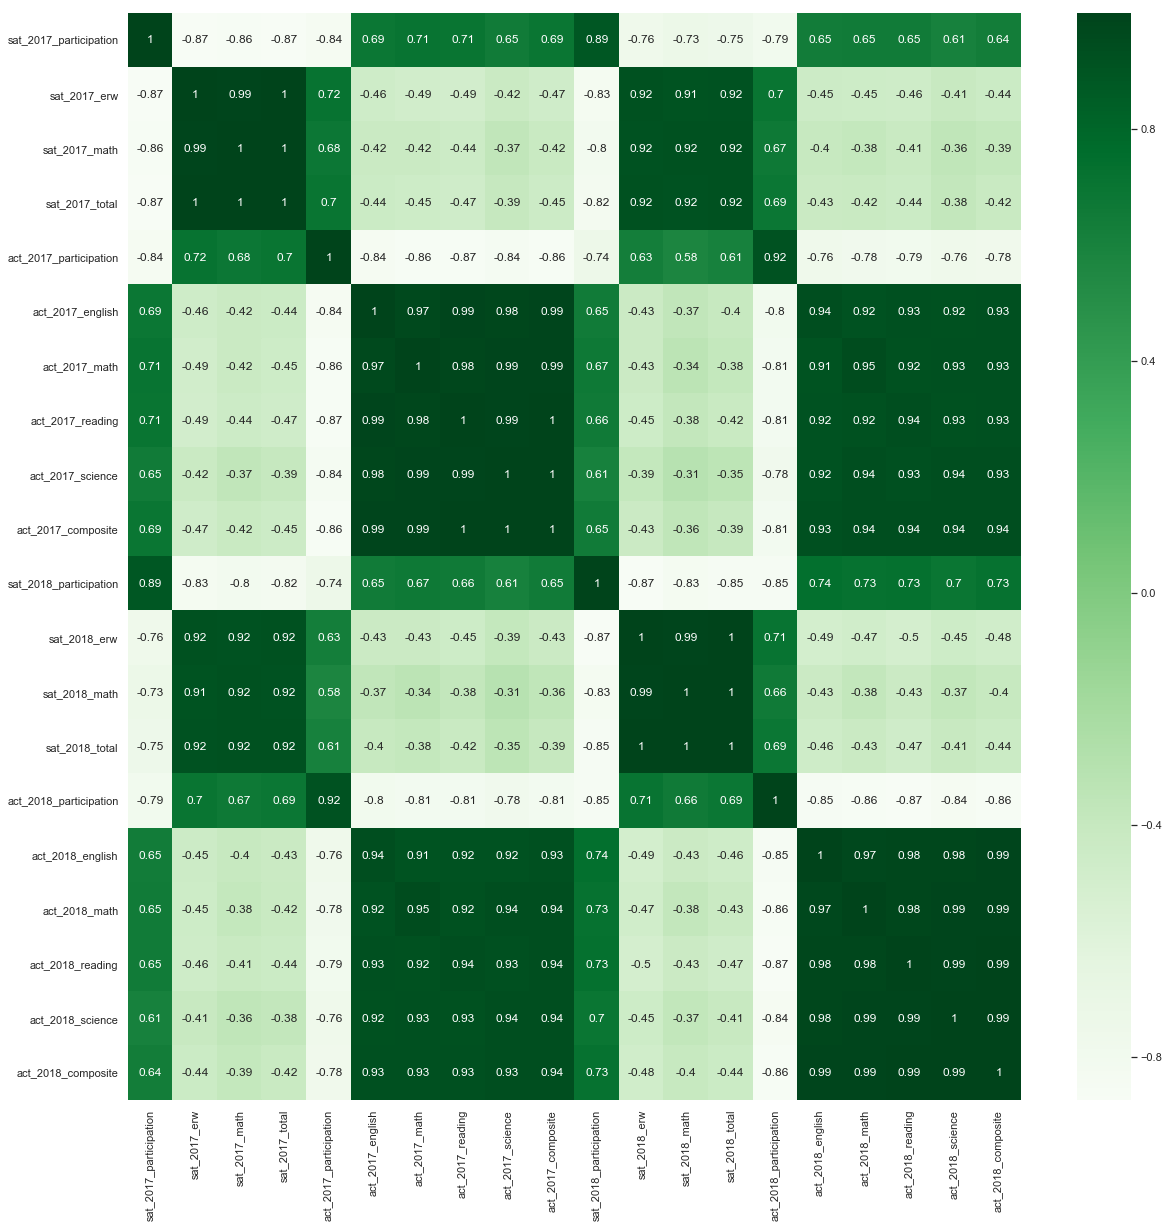

In [286]:
plt.figure(figsize=(20,20))

heat_map = sns.heatmap(final_df.corr(),annot=True,cmap="Greens")

ACT participation is generally inversely correlated with SAT participation, most likely because these are both intensive college admission tests and students generally commit to taking one or the other.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [287]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,benchmarks=[]):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
                
    fig, ax= plt.subplots(nrows=nrows, ncols=2,figsize=(15,15)) # You'll want to specify your figsize
                
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontsize=20)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=14)
        ax[i].set_ylabel('Number of states',fontsize=14)
    
    if benchmarks!=[]:
        for j in range(len(ax)):
            ax[j].axvline(x=benchmarks[j], c="red",linewidth=1,zorder=1)
    else:
        pass

    plt.show()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

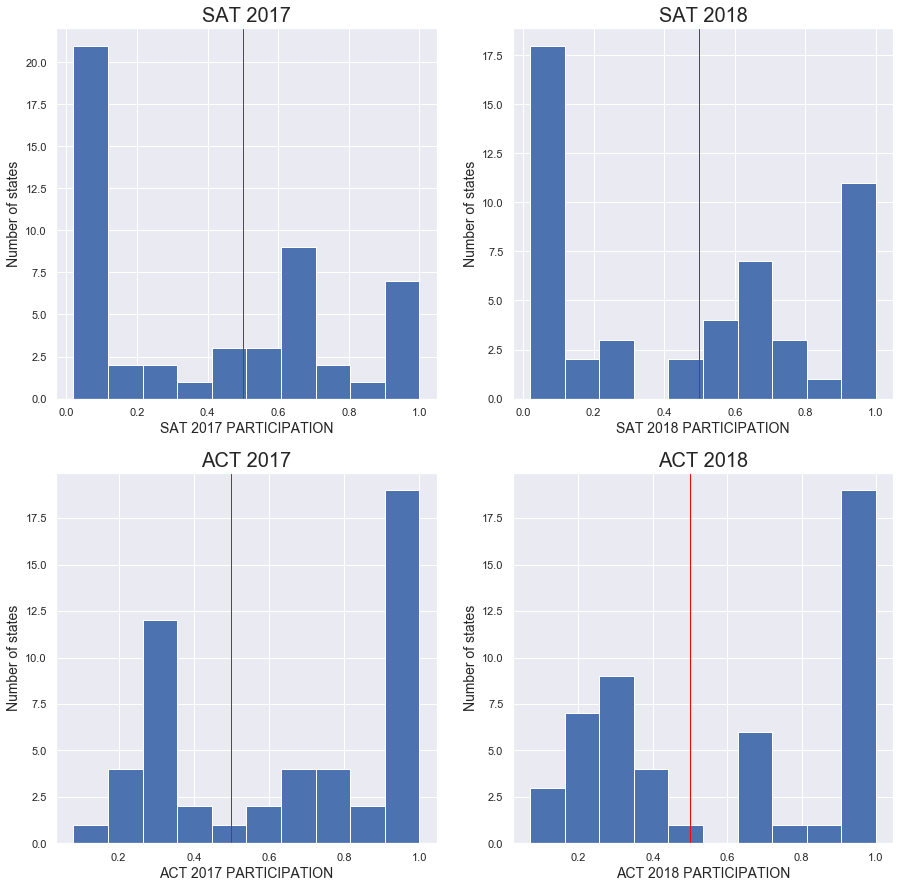

In [325]:
list_of_columns = ['sat_2017_participation','sat_2018_participation','act_2017_participation','act_2018_participation']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']
list_of_xlabels = [i.replace('_',' ').upper() for i in list_of_columns]
benchmarks = [0.5,0.5,0.5,0.5]
subplot_histograms(final_df,list_of_columns,list_of_titles,list_of_xlabels,benchmarks)

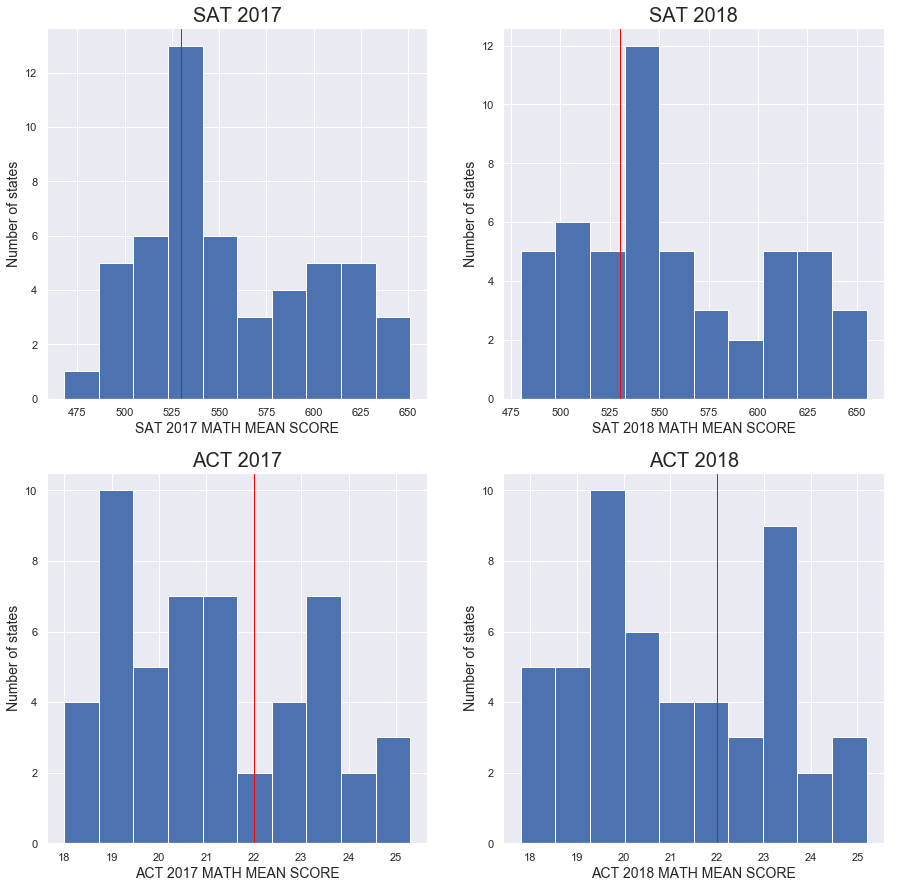

In [204]:
list_of_columns = ['sat_2017_math','sat_2018_math','act_2017_math','act_2018_math']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']
list_of_xlabels = [i.replace('_',' ').upper()+' MEAN SCORE' for i in list_of_columns] 
benchmarks = [530,530,22,22]
subplot_histograms(final_df,list_of_columns,list_of_titles,list_of_xlabels,benchmarks)

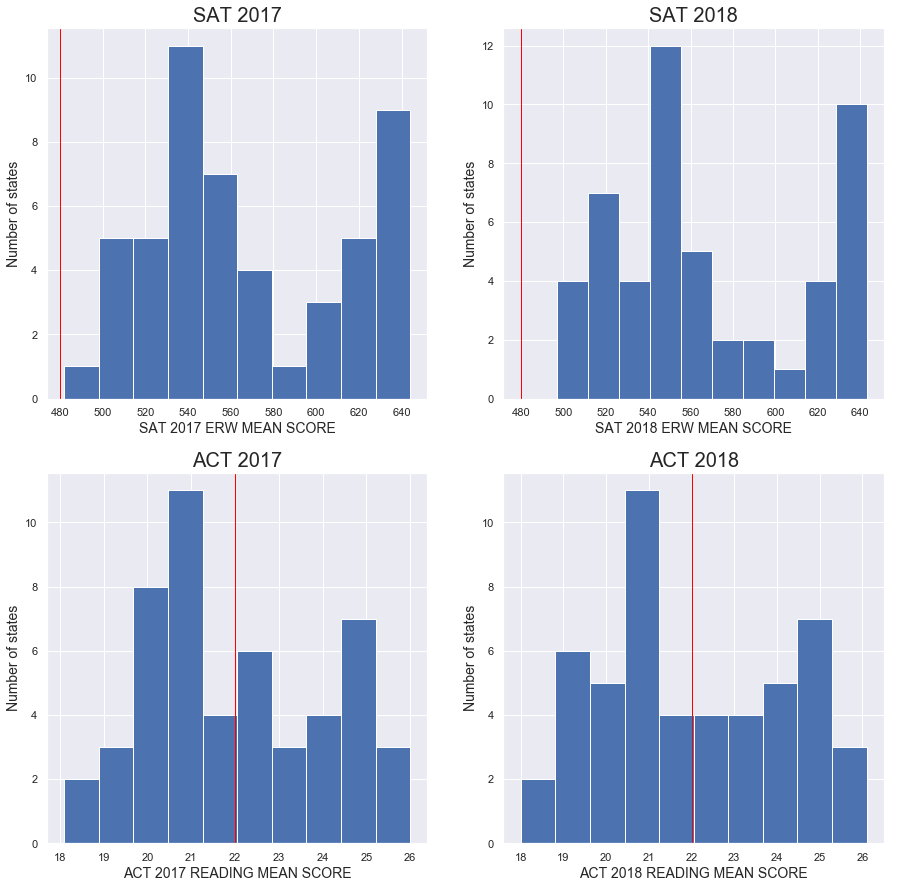

In [290]:
list_of_columns = ['sat_2017_erw','sat_2018_erw','act_2017_reading','act_2018_reading']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']
list_of_xlabels = [i.replace('_',' ').upper()+' MEAN SCORE' for i in list_of_columns] 
benchmarks = [480,480,22,22]
subplot_histograms(final_df,list_of_columns,list_of_titles,list_of_xlabels,benchmarks)

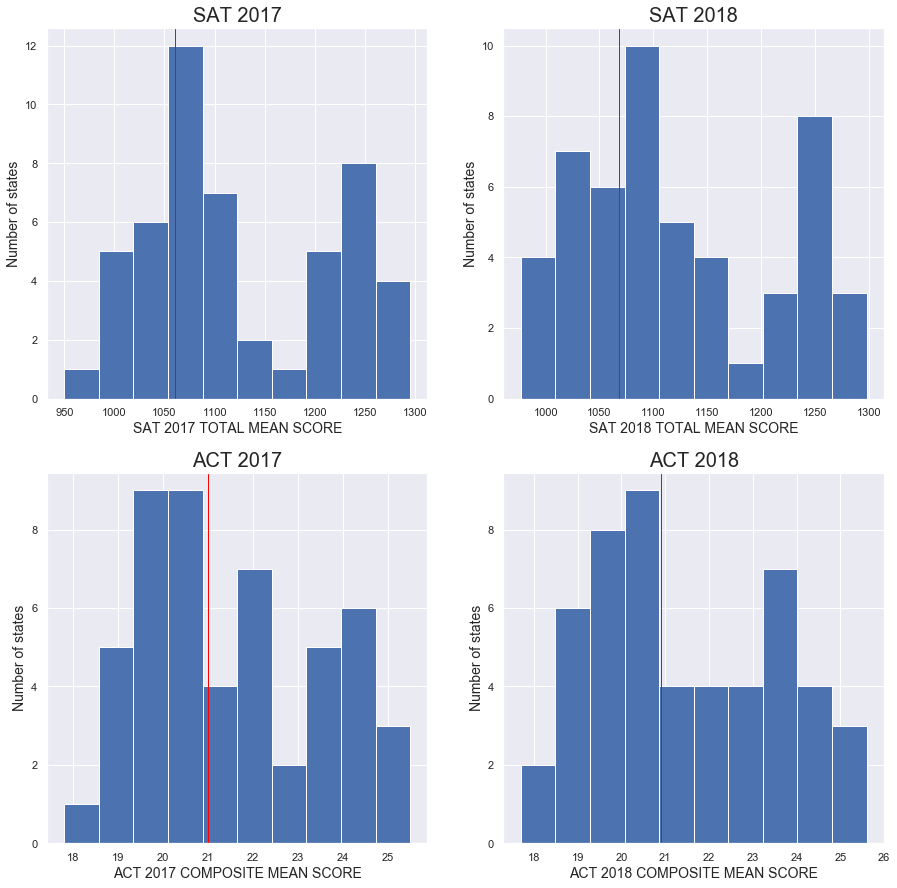

In [468]:
list_of_columns = ['sat_2017_total','sat_2018_total','act_2017_composite','act_2018_composite']
list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']
list_of_xlabels = [i.replace('_',' ').upper()+' MEAN SCORE' for i in list_of_columns] 
benchmarks = [1060,1068,21.0,20.9]
subplot_histograms(final_df,list_of_columns,list_of_titles,list_of_xlabels,benchmarks)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


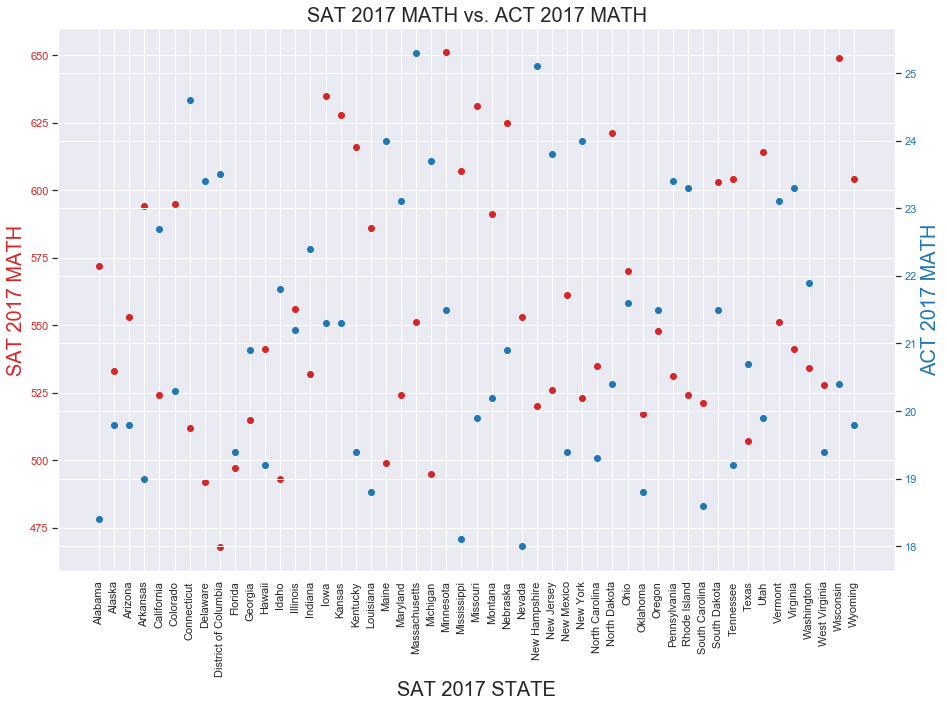

In [455]:
def scatter_twin_on_x(x_data, y_data1, y_data2):

# From here the plotting starts

    fig, ax1 = plt.subplots(figsize=(15,10))

    color = 'tab:red'
    x_data_name=x_data.name.replace('_',' ').upper()
    ax1.set_xlabel(x_data_name, fontsize=20)
    
    y_data1_name=y_data1.name.replace('_',' ').upper()
    ax1.set_ylabel(y_data1_name, color=color,fontsize=20)
    ax1.scatter(x_data, y_data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', rotation=90.0)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    y_data2_name=y_data2.name.replace('_',' ').upper()
    ax2.set_ylabel(y_data2_name, color=color,fontsize=20)  # we already handled the x-label with ax1
    ax2.scatter(x_data, y_data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(label=y_data1_name+' vs. '+y_data2_name,fontsize=20)
    plt.show()

x_data = final_df['sat_2017_state']
y_data1 = final_df['sat_2017_math']
y_data2 = final_df['act_2017_math']
scatter_twin_on_x(x_data,y_data1,y_data2)

# SAT 2017 Math vs ACT 2017 Math
## Findings
- Plotting score data by alphabetical order of state seems quite meaningless.
- The plotted points are all over the place, indicating no clear relationship between the data and the NAME of the state.
- Plotting against participation levels may be more useful.

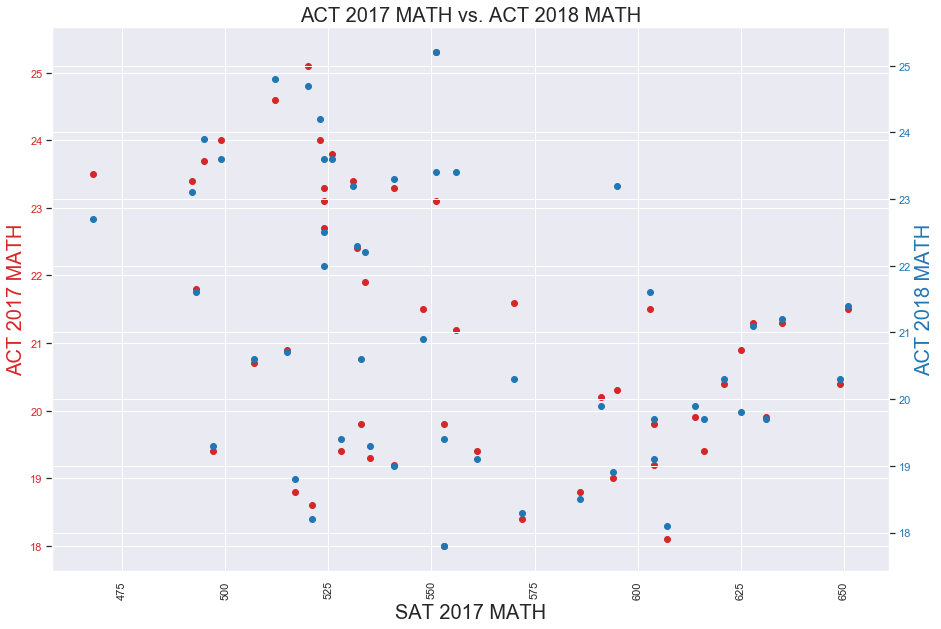

In [456]:
x_data = final_df['sat_2017_math']
y_data1 = final_df['act_2017_math']
y_data2 = final_df['act_2018_math']
scatter_twin_on_x(x_data,y_data1,y_data2)

## Initial Thoughts
- Plotting score data by alphabetical order of state seems quite meaningless.
- The plotted points are all over the place, indicating no clear relationship between the data and the NAME of the state.
- Plotting against participation levels may be more useful.

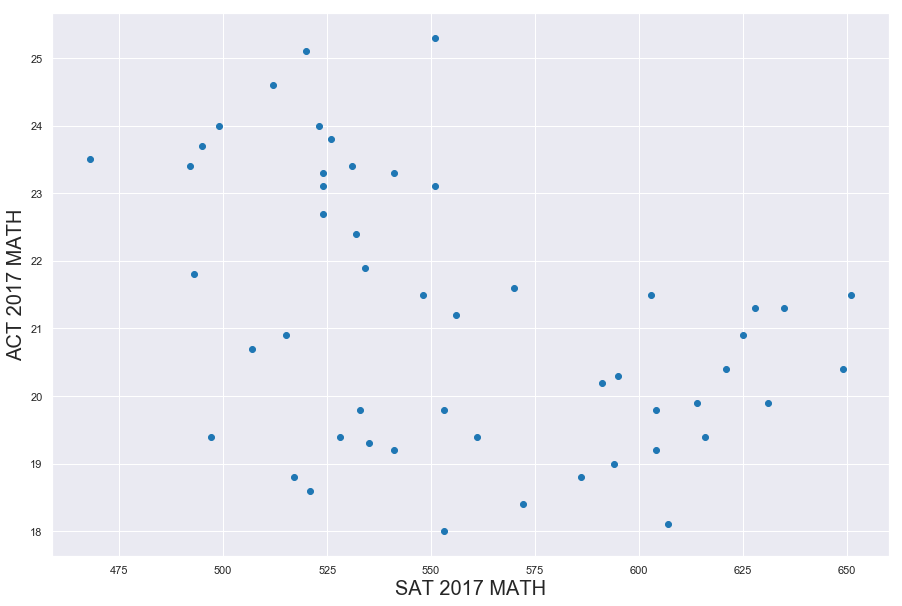

In [322]:
def scatter_two(x_data, y_data):

    fig, ax = plt.subplots(figsize=(15,10))

    color = 'tab:blue'
    ax.set_xlabel(x_data.name.replace('_',' ').upper(), fontsize=20)
    ax.set_ylabel(y_data.name.replace('_',' ').upper(), fontsize=20)
    ax.scatter(x_data, y_data, color=color)

    plt.show()

x_data = final_df['sat_2017_math']
y_data = final_df['act_2017_math']
scatter_two(x_data,y_data)

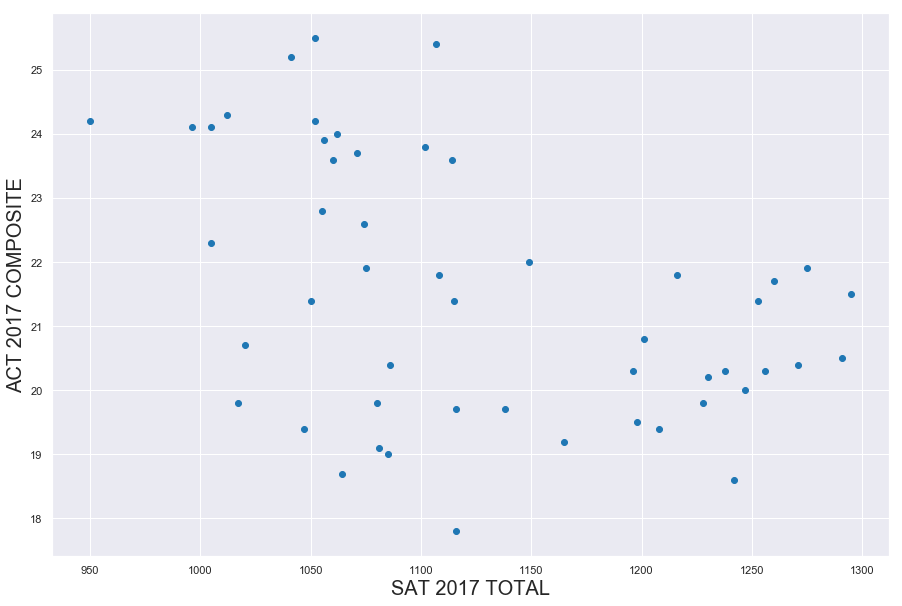

In [310]:
x_data = final_df['sat_2017_total']
y_data = final_df['act_2017_composite']
scatter_two(x_data,y_data)

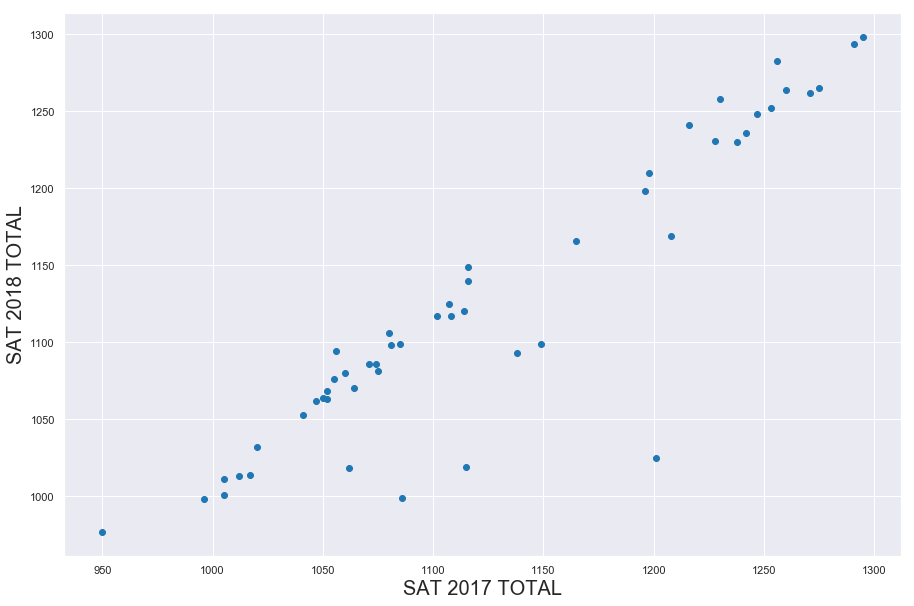

In [311]:
x_data = final_df['sat_2017_total']
y_data = final_df['sat_2018_total']
scatter_two(x_data,y_data)

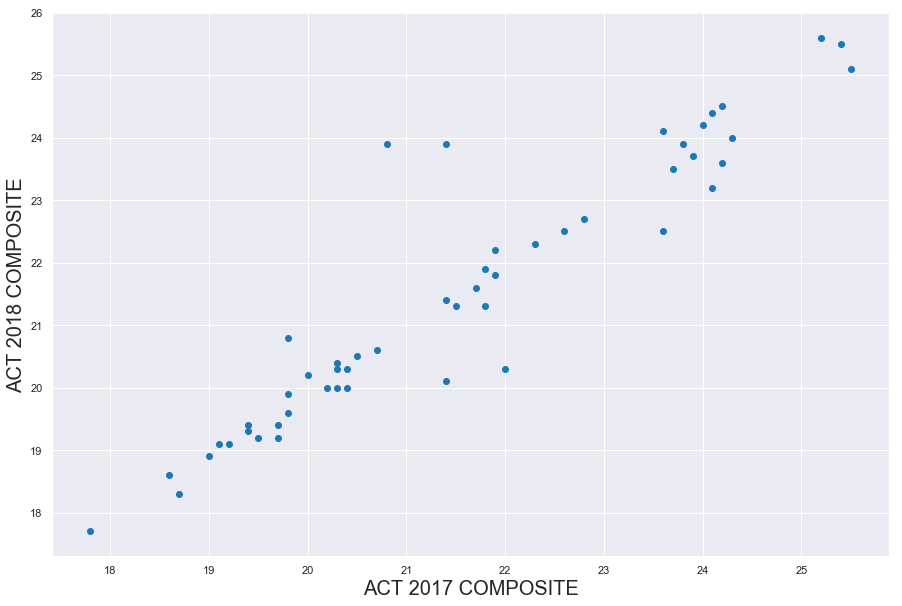

In [313]:
x_data = final_df['act_2017_composite']
y_data = final_df['act_2018_composite']
scatter_two(x_data,y_data)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 0, 'SAT Subject')

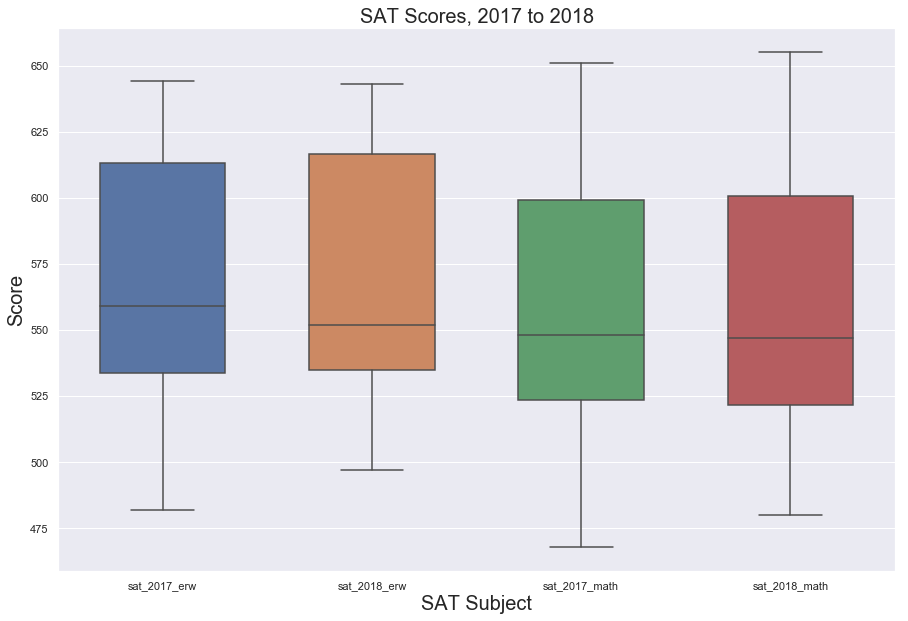

In [460]:
data_set = ['sat_2017_erw','sat_2018_erw','sat_2017_math','sat_2018_math']
fig, ax = plt.subplots(figsize=(15,10))
plt.title('SAT Scores, 2017 to 2018',fontsize=20)

sns.boxplot(data = final_df[data_set],width = 0.6)

plt.ylabel('Score',fontsize=20)
plt.xlabel('SAT Subject',fontsize=20)

Text(0.5, 0, 'ACT Subject')

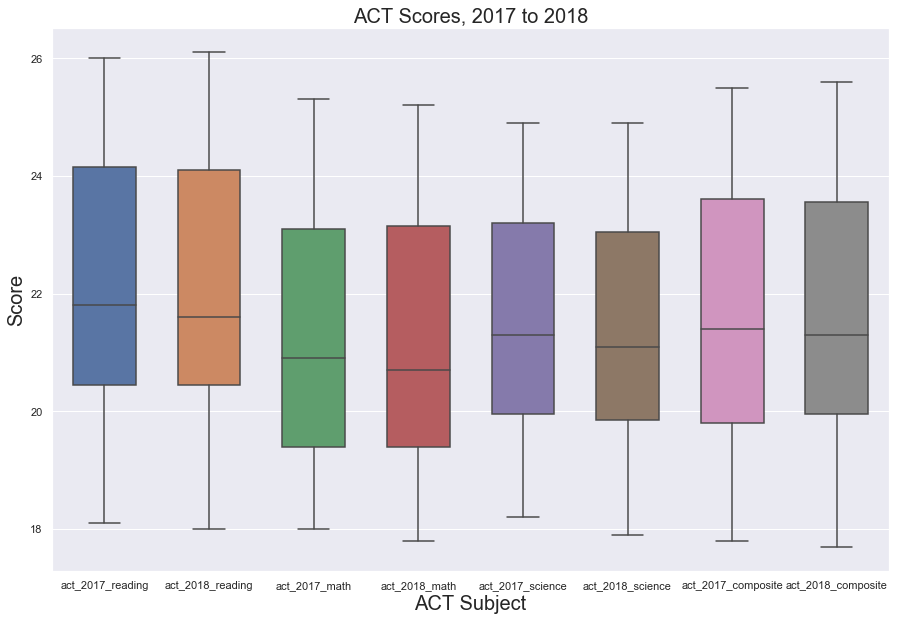

In [459]:
data_set = ['act_2017_reading','act_2018_reading',
            'act_2017_math','act_2018_math',
            'act_2017_science','act_2018_science',
            'act_2017_composite','act_2018_composite'
           ]
fig, ax = plt.subplots(figsize=(15,10))
plt.title('ACT Scores, 2017 to 2018',fontsize=20)

sns.boxplot(data = final_df[data_set],width = 0.6)

plt.ylabel('Score',fontsize=20)
plt.xlabel('ACT Subject',fontsize=20)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

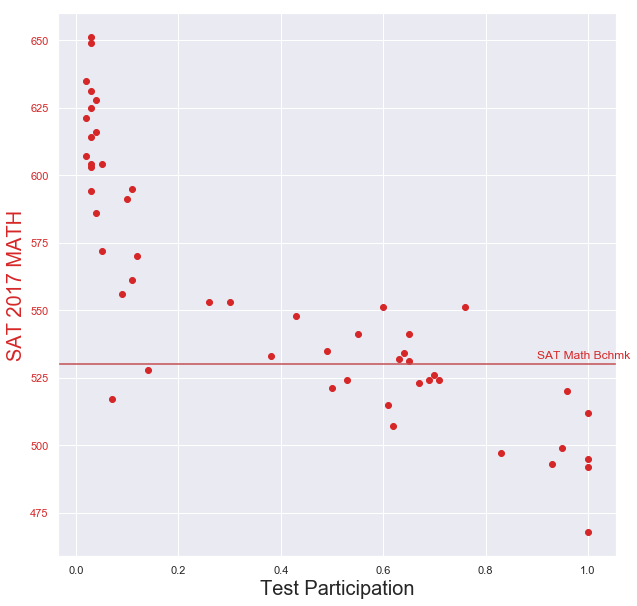

In [631]:
x_data = final_df['sat_2017_participation']
y_data = final_df['sat_2017_math']
benchmark = 530

fig, ax = plt.subplots(figsize=(10,10))

color = 'tab:red'
ax.set_xlabel('Test Participation', fontsize=20)
ax.set_ylabel(y_data.name.replace('_',' ').upper(), color=color,fontsize=20)
ax.scatter(x_data, y_data, color=color)
ax.tick_params(axis='y', labelcolor=color)
plt.axhline(y=benchmark, color='r', linestyle='-')
plt.text(x=0.90, y=benchmark+2, s="SAT Math Bchmk", fontsize=12,color=color);

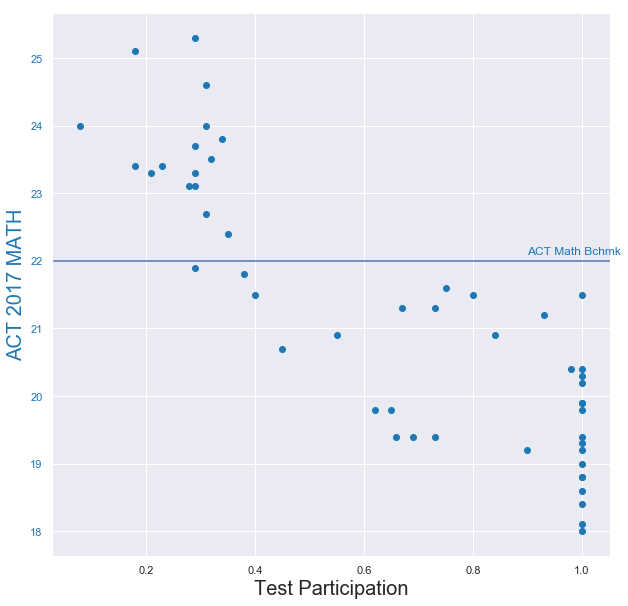

In [636]:
x_data = final_df['act_2017_participation']
y_data = final_df['act_2017_math']
benchmark = 22

fig, ax = plt.subplots(figsize=(10,10))

color = 'tab:blue'
ax.set_xlabel('Test Participation', fontsize=20)
ax.set_ylabel(y_data.name.replace('_',' ').upper(), color=color,fontsize=20)
ax.scatter(x_data, y_data, color=color)
ax.tick_params(axis='y', labelcolor=color)
plt.axhline(y=benchmark, color='b', linestyle='-')
plt.text(x=0.90, y=benchmark+0.10, s="ACT Math Bchmk", fontsize=12,color=color);

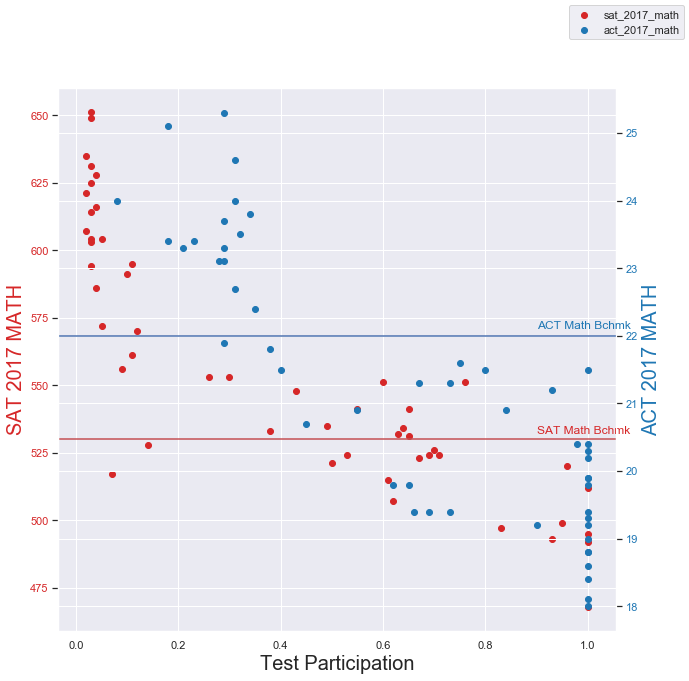

In [324]:
def scatter_twin_on_part(x_data1,x_data2,y_data1,y_data2,benchmark_1,benchmark_2):

    fig, ax1 = plt.subplots(figsize=(10,10))

    color = 'tab:red'
    ax1.set_xlabel('Test Participation', fontsize=20)
    ax1.set_ylabel(y_data1.name.replace('_',' ').upper(), color=color,fontsize=20)
    ax1.scatter(x_data1, y_data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.axhline(y=benchmark_1, color='r', linestyle='-')
    plt.text(x=0.90, y=benchmark_1+2, s="SAT Math Bchmk", fontsize=12,color=color);

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis as the above plot

    color = 'tab:blue'
    ax2.set_ylabel(y_data2.name.replace('_',' ').upper(), color=color,fontsize=20)  # we already handled the x-label with ax1
    ax2.scatter(x_data2, y_data2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.axhline(y=benchmark_2, color='b', linestyle='-')
    plt.text(x=0.90, y=benchmark_2+0.10, s="ACT Math Bchmk", fontsize=12, color=color);
    fig.legend()
    plt.show()
    
x_data1 = final_df['sat_2017_participation']
x_data2 = final_df['act_2017_participation']
y_data1 = final_df['sat_2017_math']
y_data2 = final_df['act_2017_math']
benchmark_1 = 530
benchmark_2 = 22
scatter_twin_on_part(x_data1,x_data2,y_data1,y_data2,benchmark_1,benchmark_2)

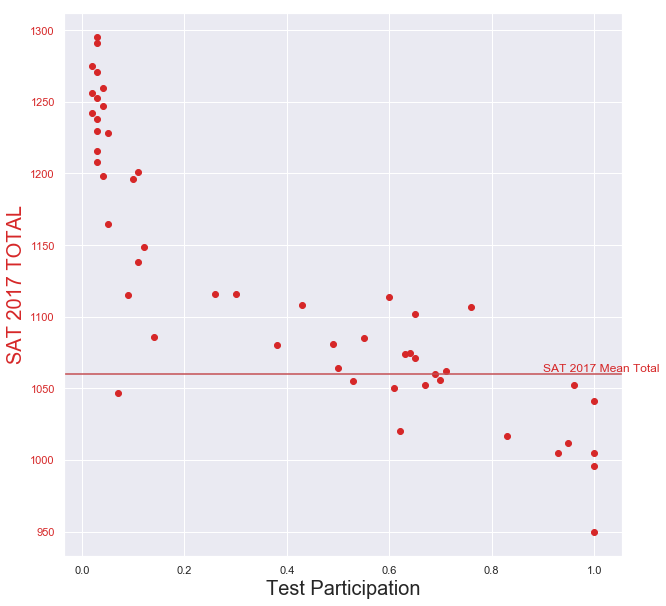

In [645]:
x_data = final_df['sat_2017_participation']
y_data = final_df['sat_2017_total']
benchmark = 1060

fig, ax = plt.subplots(figsize=(10,10))

color = 'tab:red'
ax.set_xlabel('Test Participation', fontsize=20)
ax.set_ylabel(y_data.name.replace('_',' ').upper(), color=color,fontsize=20)
ax.scatter(x_data, y_data, color=color)
ax.tick_params(axis='y', labelcolor=color)
plt.axhline(y=benchmark, color='r', linestyle='-')
plt.text(x=0.90, y=benchmark+2, s="SAT 2017 Mean Total", fontsize=12,color=color);

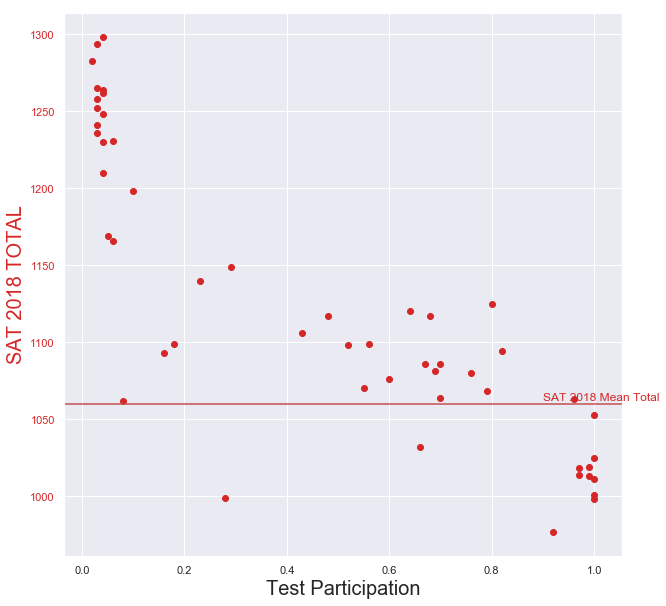

In [646]:
x_data = final_df['sat_2018_participation']
y_data = final_df['sat_2018_total']
benchmark = 1060

fig, ax = plt.subplots(figsize=(10,10))

color = 'tab:red'
ax.set_xlabel('Test Participation', fontsize=20)
ax.set_ylabel(y_data.name.replace('_',' ').upper(), color=color,fontsize=20)
ax.scatter(x_data, y_data, color=color)
ax.tick_params(axis='y', labelcolor=color)
plt.axhline(y=benchmark, color='r', linestyle='-')
plt.text(x=0.90, y=benchmark+2, s="SAT 2018 Mean Total", fontsize=12,color=color);

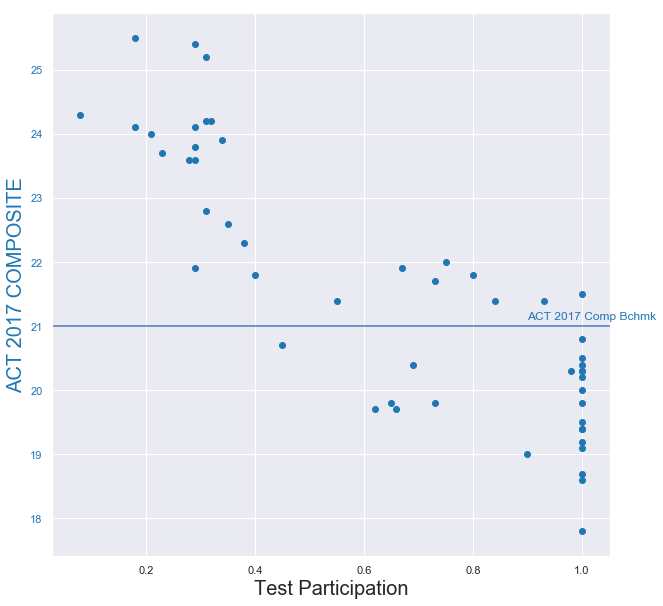

In [650]:
x_data = final_df['act_2017_participation']
y_data = final_df['act_2017_composite']
benchmark = 21.0

fig, ax = plt.subplots(figsize=(10,10))

color = 'tab:blue'
ax.set_xlabel('Test Participation', fontsize=20)
ax.set_ylabel(y_data.name.replace('_',' ').upper(), color=color,fontsize=20)
ax.scatter(x_data, y_data, color=color)
ax.tick_params(axis='y', labelcolor=color)
plt.axhline(y=benchmark, color='b', linestyle='-')
plt.text(x=0.90, y=benchmark+0.10, s="ACT 2017 Comp Bchmk", fontsize=12,color=color);

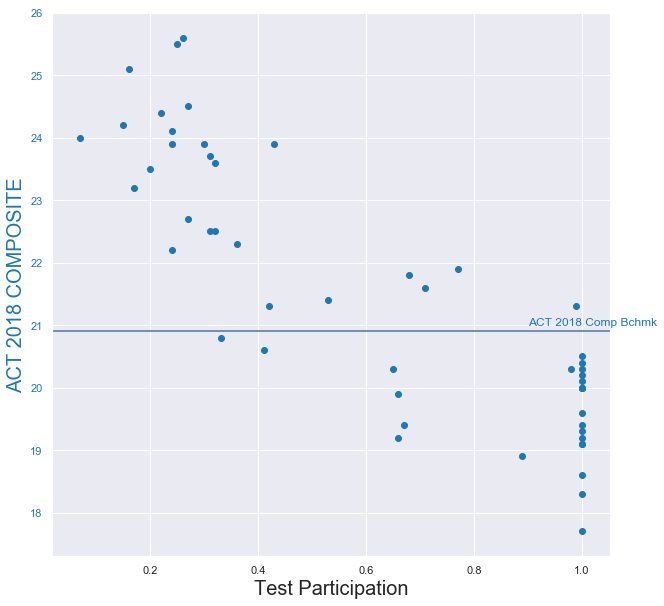

In [651]:
x_data = final_df['act_2018_participation']
y_data = final_df['act_2018_composite']
benchmark = 20.9

fig, ax = plt.subplots(figsize=(10,10))

color = 'tab:blue'
ax.set_xlabel('Test Participation', fontsize=20)
ax.set_ylabel(y_data.name.replace('_',' ').upper(), color=color,fontsize=20)
ax.scatter(x_data, y_data, color=color)
ax.tick_params(axis='y', labelcolor=color)
plt.axhline(y=benchmark, color='b', linestyle='-')
plt.text(x=0.90, y=benchmark+0.10, s="ACT 2018 Comp Bchmk", fontsize=12,color=color);

# Scores vs Test Participation

## Findings


- Plotting scores against test participation rates and scoring benchmakrs presents more meaningful findings.

**Benchmarks**

- Many states do not meet the [ACT benchmarks](https://www.act.org/content/dam/act/unsecured/documents/pdfs/R1670-college-readiness-benchmarks-2017-11.pdf) or [SAT Benchmarks](https://collegereadiness.collegeboard.org/about/scores/benchmarks) for each test.
- Most state mean Total scores are at or above the SAT national mean.
- Approximately half of all state mean composite scores are at or above the ACT national benchmark.
- As participation levels increase, mean Total and Composite scores decrease.
<br>
</br>

**Participation**
- Numerous states have full participation in the ACTs and SATs.
    - All the high-to-full participation states' Math mean scores fell below the benchmarks.
    - Mandatory participation has been enforced in several US states.
    - Incentives are given, such as partial or full state sponsorship.
- More "normal" results are included where all students participate in the tests, thus lowering the state averages
- Most states with high average scores have low participation rates.
    - These states may send only their best students to participate, ensuring a high state average.
    - These states may also have no mandatory participation policies for either test.
- ACTs see overall higher levels of participation than SATs.



In [612]:
def scatter_change(df,col_list=[]):
    change_df = df[col_list]
    change_series = pd.Series(df[col_list[2]]-df[col_list[1]])
    change_df.insert(3,'change',change_series)
    change_df = change_df.sort_values('change')
    y_name = change_df[col_list[0]].name.replace('_',' ').upper()
    x_name = change_df[col_list[1]].name.replace('_',' ').upper()
    
    plt.figure(figsize=(10,15))
    plt.scatter(sorted(change_df['change']),change_df[col_list[0]])
    plt.axvline(x=0,ls='-',color='red')
    plt.xlabel(x_name[:3]+x_name[8:]+' CHANGE '+col_list[1][4:8]+' TO '+col_list[2][4:8],fontsize=16)
    plt.ylabel(y_name[-5:],fontsize=16)
    plt.show()
    
    print(change_df.tail(3))

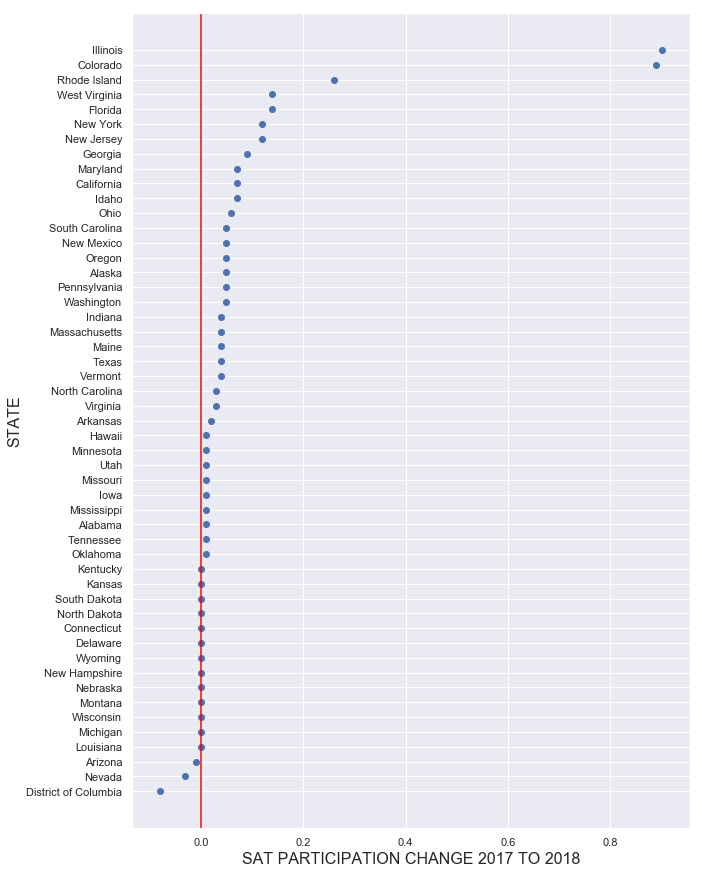

   sat_2017_state  sat_2017_participation  sat_2018_participation  change
39   Rhode Island                    0.71                    0.97    0.26
5        Colorado                    0.11                    1.00    0.89
13       Illinois                    0.09                    0.99    0.90


In [613]:
scatter_change(final_df,col_list=['sat_2017_state','sat_2017_participation','sat_2018_participation'])

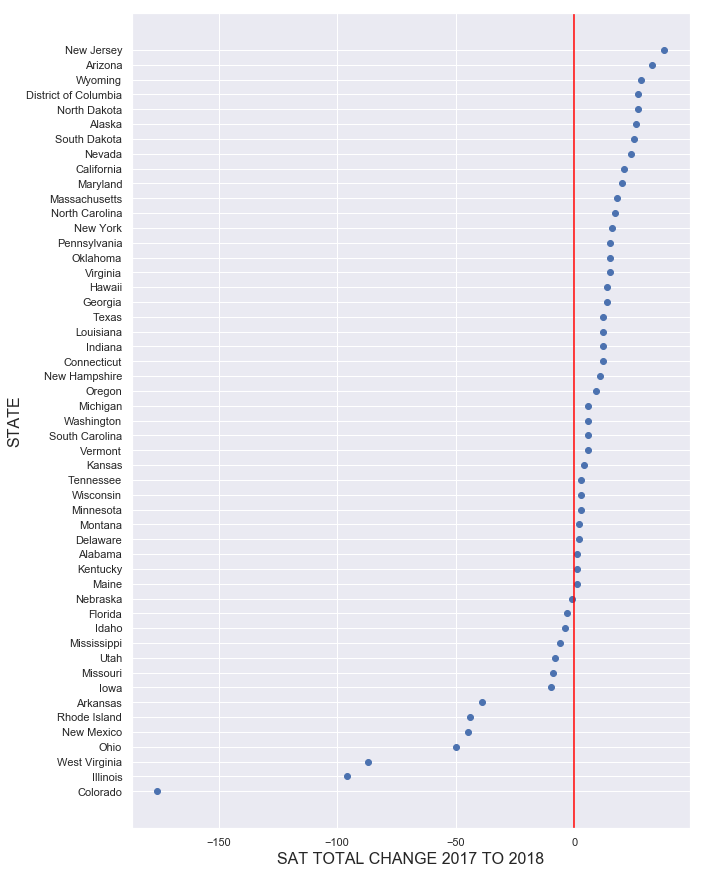

   sat_2017_state  sat_2017_total  sat_2018_total  change
50        Wyoming            1230            1258      28
2         Arizona            1116            1149      33
30     New Jersey            1056            1094      38


In [652]:
scatter_change(final_df,col_list=['sat_2017_state','sat_2017_total','sat_2018_total'])

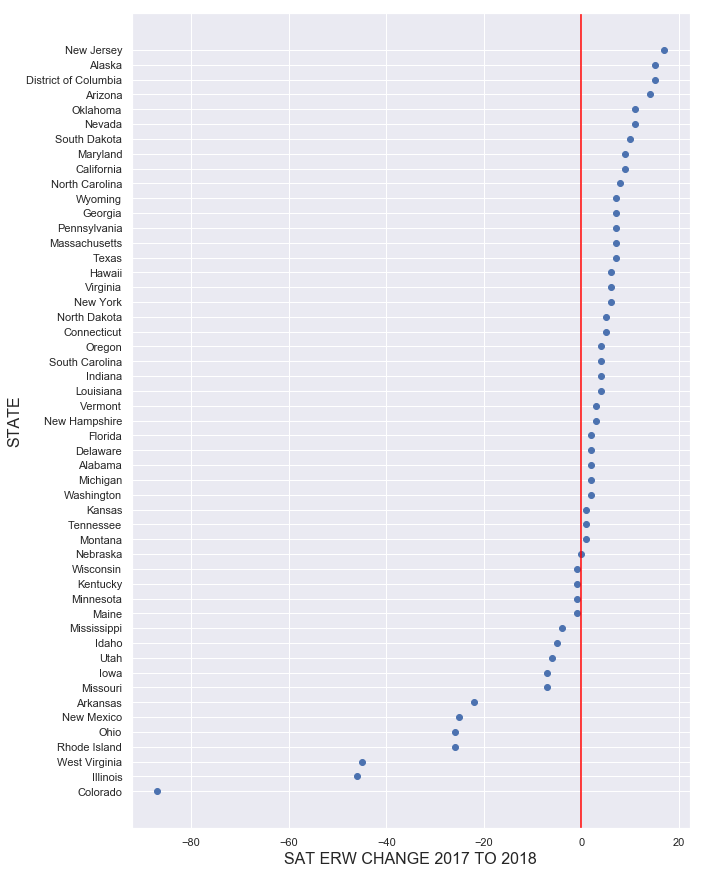

          sat_2017_state  sat_2017_erw  sat_2018_erw  change
8   District of Columbia           482           497      15
1                 Alaska           547           562      15
30            New Jersey           530           547      17


In [614]:
scatter_change(final_df,col_list=['sat_2017_state','sat_2017_erw','sat_2018_erw'])

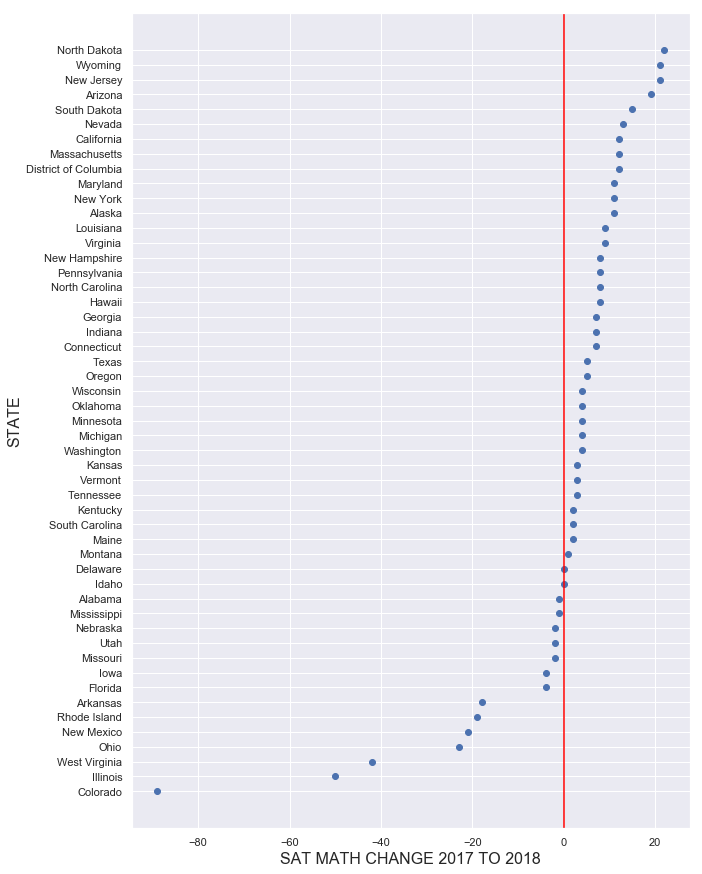

   sat_2017_state  sat_2017_math  sat_2018_math  change
30     New Jersey            526            547      21
50        Wyoming            604            625      21
34   North Dakota            621            643      22


In [615]:
scatter_change(final_df,col_list=['sat_2017_state','sat_2017_math','sat_2018_math'])

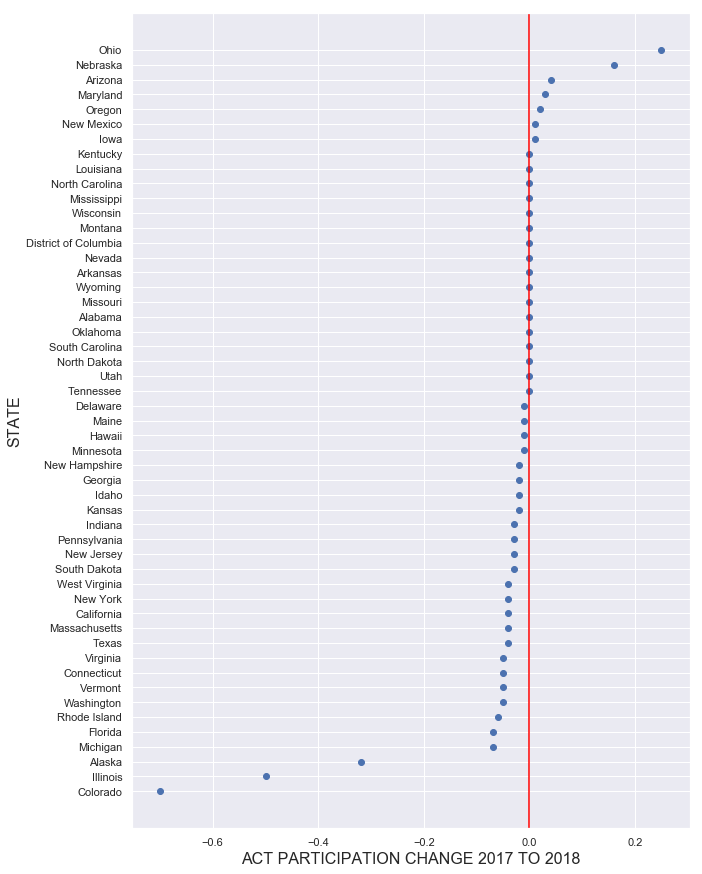

   act_2017_state  act_2017_participation  act_2018_participation  change
2         Arizona                    0.62                    0.66    0.04
27       Nebraska                    0.84                    1.00    0.16
35           Ohio                    0.75                    1.00    0.25


In [616]:
scatter_change(final_df,col_list=['act_2017_state','act_2017_participation','act_2018_participation'])

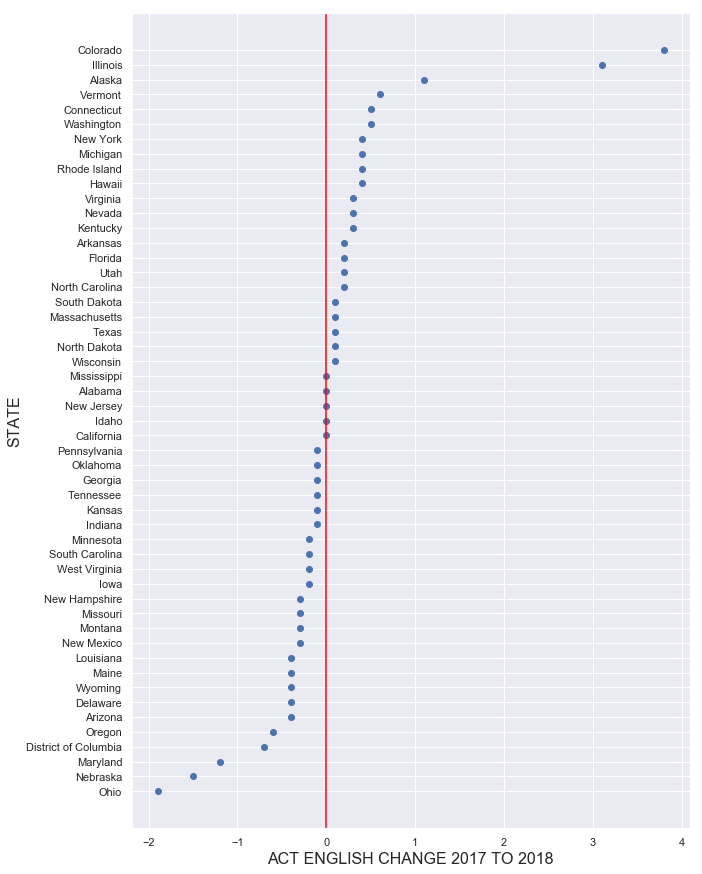

   act_2017_state  act_2017_english  act_2018_english  change
1          Alaska              18.7              19.8     1.1
13       Illinois              21.0              24.1     3.1
5        Colorado              20.1              23.9     3.8


In [617]:
scatter_change(final_df,col_list=['act_2017_state','act_2017_english','act_2018_english'])

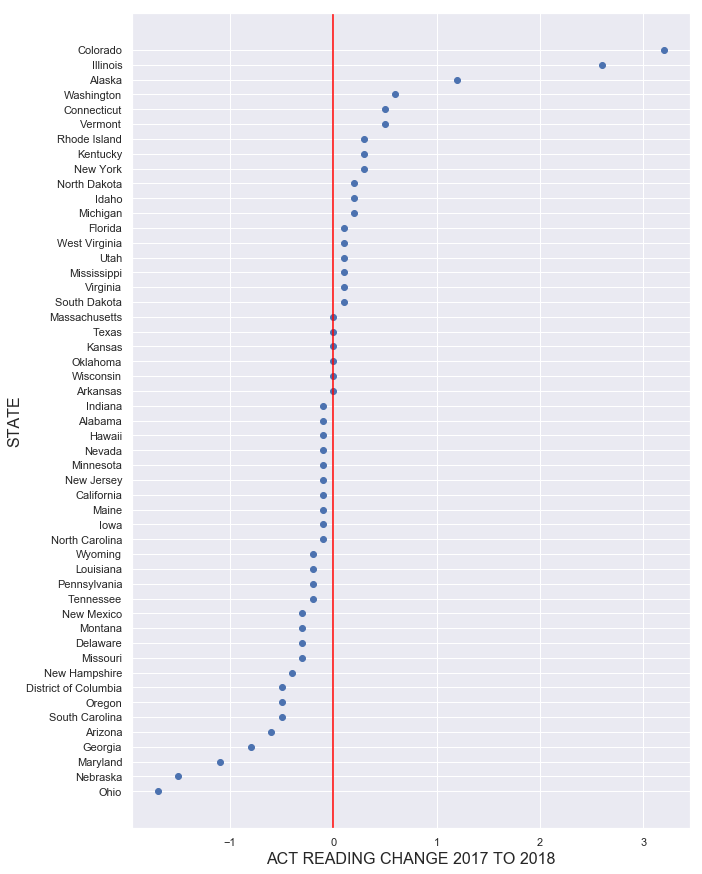

   act_2017_state  act_2017_reading  act_2018_reading  change
1          Alaska              20.4              21.6     1.2
13       Illinois              21.6              24.2     2.6
5        Colorado              21.2              24.4     3.2


In [618]:
scatter_change(final_df,col_list=['act_2017_state','act_2017_reading','act_2018_reading'])

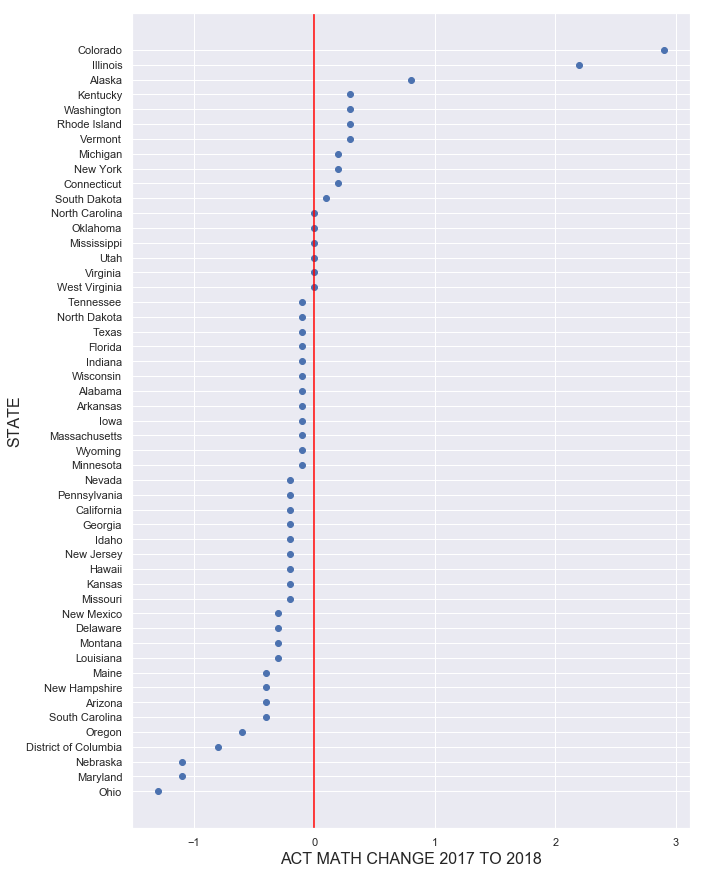

   act_2017_state  act_2017_math  act_2018_math  change
1          Alaska           19.8           20.6     0.8
13       Illinois           21.2           23.4     2.2
5        Colorado           20.3           23.2     2.9


In [619]:
scatter_change(final_df,col_list=['act_2017_state','act_2017_math','act_2018_math'])

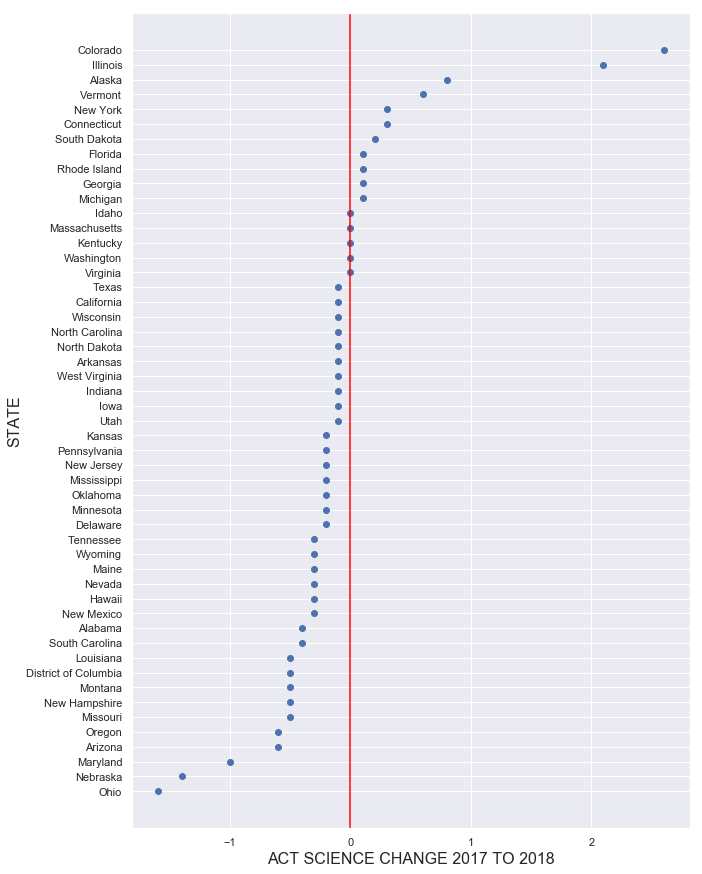

   act_2017_state  act_2017_science  act_2018_science  change
1          Alaska              19.9              20.7     0.8
13       Illinois              21.3              23.4     2.1
5        Colorado              20.9              23.5     2.6


In [620]:
scatter_change(final_df,col_list=['act_2017_state','act_2017_science','act_2018_science'])

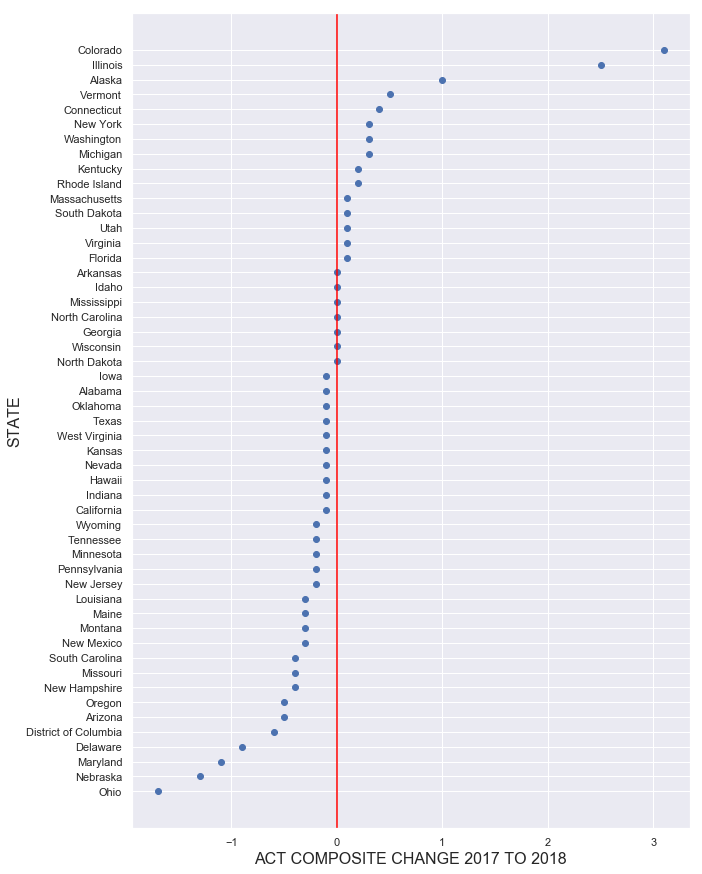

   act_2017_state  act_2017_composite  act_2018_composite  change
1          Alaska                19.8                20.8     1.0
13       Illinois                21.4                23.9     2.5
5        Colorado                20.8                23.9     3.1


In [621]:
scatter_change(final_df,col_list=['act_2017_state','act_2017_composite','act_2018_composite'])

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [622]:
stat_desc = final_df.describe()
stat_desc = stat_desc.append(pd.Series(final_df.skew(axis=0)).rename('skew'))
stat_desc = stat_desc.transpose()
stat_desc['spread_(abs_%)']=[abs(i-1)*100 for i in list(stat_desc['50%']/stat_desc['mean'])]
stat_desc=stat_desc[['mean','50%','spread_(abs_%)','skew']]
stat_desc

,mean,50%,spread_(abs_%),skew
sat_2017_participation,0.398039,0.38,4.532020,0.346450
sat_2017_erw,569.117647,559.00,1.777778,0.272693
sat_2017_math,556.882353,548.00,1.595014,0.365040
sat_2017_total,1126.098039,1107.00,1.695948,0.310903
act_2017_participation,0.652549,0.69,5.739183,-0.197989
act_2017_english,20.931373,20.70,1.105386,0.352660
act_2017_math,21.182353,20.90,1.332963,0.332683
act_2017_reading,22.013725,21.80,0.970874,0.269366
act_2017_science,21.450980,21.30,0.703839,0.218823
act_2017_composite,21.519608,21.40,0.555809,0.319810


In [623]:
def det_spread(x):
    if x >5:
        return "L" 
    else:
        return "S"

def det_skew(y):
    if y > 0.0:
        return "POS"
    elif y < 0:
        return "NEG"
    
spread_intpt = list(map(det_spread,stat_desc['spread_(abs_%)']))
stat_desc['spread_rating']=spread_intpt

skew_intpt = list(map(det_skew,stat_desc['skew']))

stat_desc['skew_type']= skew_intpt
stat_desc

,mean,50%,spread_(abs_%),skew,spread_rating,skew_type
sat_2017_participation,0.398039,0.38,4.532020,0.346450,S,POS
sat_2017_erw,569.117647,559.00,1.777778,0.272693,S,POS
sat_2017_math,556.882353,548.00,1.595014,0.365040,S,POS
sat_2017_total,1126.098039,1107.00,1.695948,0.310903,S,POS
act_2017_participation,0.652549,0.69,5.739183,-0.197989,L,NEG
act_2017_english,20.931373,20.70,1.105386,0.352660,S,POS
act_2017_math,21.182353,20.90,1.332963,0.332683,S,POS
act_2017_reading,22.013725,21.80,0.970874,0.269366,S,POS
act_2017_science,21.450980,21.30,0.703839,0.218823,S,POS
act_2017_composite,21.519608,21.40,0.555809,0.319810,S,POS


In [624]:
small_spread = stat_desc[stat_desc['spread_rating']=='S']
small_spread

,mean,50%,spread_(abs_%),skew,spread_rating,skew_type
sat_2017_participation,0.398039,0.38,4.532020,0.346450,S,POS
sat_2017_erw,569.117647,559.00,1.777778,0.272693,S,POS
sat_2017_math,556.882353,548.00,1.595014,0.365040,S,POS
sat_2017_total,1126.098039,1107.00,1.695948,0.310903,S,POS
act_2017_english,20.931373,20.70,1.105386,0.352660,S,POS
act_2017_math,21.182353,20.90,1.332963,0.332683,S,POS
act_2017_reading,22.013725,21.80,0.970874,0.269366,S,POS
act_2017_science,21.450980,21.30,0.703839,0.218823,S,POS
act_2017_composite,21.519608,21.40,0.555809,0.319810,S,POS
sat_2018_erw,567.294118,552.00,2.695977,0.358866,S,POS


In [625]:
smallest_spread = small_spread[small_spread['spread_(abs_%)']<1]
smallest_spread

,mean,50%,spread_(abs_%),skew,spread_rating,skew_type
act_2017_reading,22.013725,21.8,0.970874,0.269366,S,POS
act_2017_science,21.450980,21.3,0.703839,0.218823,S,POS
act_2017_composite,21.519608,21.4,0.555809,0.319810,S,POS
act_2018_composite,21.486275,21.3,0.866947,0.281962,S,POS


ACT 2018 scores have the smallest spread. With reference to the earlier histogram 

In [626]:
large_spread = stat_desc[stat_desc['spread_rating']=='L']
large_spread

,mean,50%,spread_(abs_%),skew,spread_rating,skew_type
act_2017_participation,0.652549,0.69,5.739183,-0.197989,L,NEG
sat_2018_participation,0.466275,0.52,11.522288,0.108659,L,POS
act_2018_participation,0.616471,0.66,7.061069,-0.021916,L,NEG


Answer:

The data generally exist in skewed, seemingly bimodal distributions, except:
- ACT 2017 Participation (Large NEG skew, bimodal)
- SAT 2018 Participation (Large POS skew, bimodal)
- ACT 2018 Participation (Large NEG skew, bimodal)

Only one variable has a distribution close to a normal distribution:
- ACT 2018 Composite Scores (Small POS skew)
- The distribution seems close to a normal distribution, although its upper range of values appear to be more uniform and do not tend towards the mean.

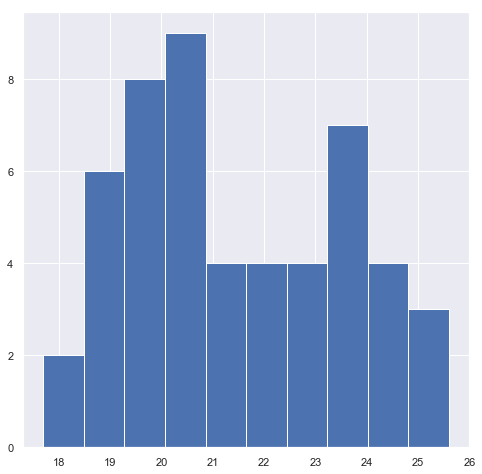

In [627]:
plt.figure(figsize=(8,8))
plt.hist(final_df['act_2018_composite'])

plt.show()

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?
**Answer:**

The trend should hold with a big enough sample size, but not in this case. With only 2 samples of data for each state, it will be difficult to observe the trend.

According to the Central Limit Theorem, 30 samples or more should see the data tend towards the normal distribution.

**Does This Assumption Hold for:**
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer**

This assumption does not hold for the current datasets except for ACT 2018 Composite, as explained earlier.

This will affect the type of method used to estimate probablities, such as when trying to determine P(x1 <= X <= x2) within one of the above distributions. 

Without being confident of the type of distribution involved, it is not possible to accurately estimate probabilities.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**

Statistical inference may be appropriate to a limited extent, if the purpose is only to understand the relationship between SAT and ACT participation rates in 2017.

<br>

It could be a justifiable comparison because:
- The data are the same kind of metric (participation for test used in college admissions)
- Exactly the same scale (0.00 to 1.00)
    - It is possible to establish a reasonably accurate correlation value.
</br>

However, without further data, further issues can crop up:
- They are not entirely independent variables.
    - Test participation rules vary across the states
    - Each is a major exam that can be used for college admission
        - Taking one test likely means not taking the other
- The populations of each state are not reflected directly in the participation data.
    - Some states, such as Florida, have [high populations](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent) (147,058 students). 
    - The high population is more likely to drastically lower their mean scores than it is for a less populous state (147,058 students in Florida vs. 14,834 students in Rhode Island).
- They have a strong negative correlation with each other (approx. -0.8)

<br>

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

No. It would be appropriate to compare scores between states of equal or similar participation levels, but comparing scores across the board does not seem meaningful.

This is because participation levels have a direct impact on mean scores.

If a comparison must be done, then scores should be [adjusted to an expected value based on the state's level of participation](https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate).

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

**In-depth statistical inference not conducted.**

There would not be much value in running even a Student's T test, because there is no control group to compare to.

With reference to the Problem Statement, if we are investigating the aftereffects of the restructuring of the SATs...

- Any control group would have to come from before the restructuring, which took place in 2016, before our current data sets were gathered.

- Testing between two similar but not quite equivalent groups does not seem to be meaningful.
    - This is especially so in the wake of recent policy changes.
    - Such changes can take years to stabilise.
    
- There are not enough samples to ascertain the "true" distribution type of any variables and confidently select the right statistical test.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### My chosen states

- Illinois
- Colorado
- Alaska

These states saw the biggest changes in participation rates for both ACT and SAT.

**Illinois**

The state government of Illinois made the [SATs compulsory and started phasing out the ACT in 2016](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html). "Fewer than 6,000 high school graduates in 2015 took the SAT in Illinois, compared with about 157,000 who took the ACT." (Rado, D., Chicago Tribune, 2016)

According to the above article, 143,000 took the SATs after they were made compulsory and the test was restructured. Not only was the SAT made compulsory, the test also became state-sponsored, further incentivising participation.

**Colorado**

Similar to Illinois, the state of Colorado [signed a contract with the College Board to adopt and push the SAT in 2016](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/). Additionally, "SAT usage also spiked in Colorado because of a contract with the College Board. There, 58,790 in the Class of 2018 took the test, 10 times the total of the previous year." (Anderson, N., Washington Post, 2018)

**Alaska**

Alaska, [EdWeek suggests](https://www.edweek.org/ew/articles/2018/10/17/math-scores-slide-to-a-20-year-low.html), saw a large drop in ACT participation rates because the ACT was "losing ground" nationwide. 

It is also interesting to note that all 3 states saw sharp dips in ACT participation and also saw the largest increases in mean scores for the ACTs.

This supports the idea that increased participation lowers overall means scores and decreased participation raises overall mean scores.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Key Takeaways

- Data loses its meaning without context. Research can explain numbers, but numbers cannot tell a story by themselves. 
- EDA helps you understand your data and what areas to research in order to make your analysis more accurate.
- The more similar the dependent variables of two datasets, the more equitable the comparison.
- Crafting a good problem statement and reading the task requirement is essential for effective and efficient execution of EDA.


### Recommendations
- College Board should continue reviewing how the new SAT format affects participation levels.
- Maintaining or growing its advantage over the ACT now would be ideal, to enable it to hold this superior position for several years to come.


### Chosen State and How to Increase SAT Participation
- District of Columbia's SAT participation rate saw a decrease, with no perceptible corresponding increase in ACT participation rates. 
- It is possible that the District's students may still be taking the ACTs instead of the SATs because it is more advantageous.
- The College Board could try negotiating with private colleges to offer more scholarship money for students who qualify with good SAT scores.

# References

1. [Business Insider: SAT is changing the format of its test in 2016](https://www.businessinsider.com/the-sat-is-changing-its-format-in-2016-and-will-be-easier-2015-6/?IR=T)
2. [College Board's official report on the SAT re-design](https://collegereadiness.collegeboard.org/pdf/test-specifications-redesigned-sat-1.pdf)
3. https://www.act.org/content/dam/act/unsecured/documents/pdfs/R1670-college-readiness-benchmarks-2017-11.pdf
4. https://collegereadiness.collegeboard.org/about/scores/benchmarks
5. https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
6. https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html
7. https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
8. https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/
9. https://www.edweek.org/ew/articles/2018/10/17/math-scores-slide-to-a-20-year-low.html
10. https://www.act.org/content/dam/act/secured/documents/cccr2018/National-CCCR-2018.pdf
